In [1]:
install.packages("GLMsData")
library(GLMsData)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### 5
To gain experience reading Q–Q plots, use r to produce Q–Q plots of
data known to be generated randomly from a standard normal distribution
using rnorm(). Generate ten Q–Q plots based on 100 random numbers, and
comment on using Q–Q plots when n = 100. Repeat the exercise for n = 50,
20 and 10, and comment further.

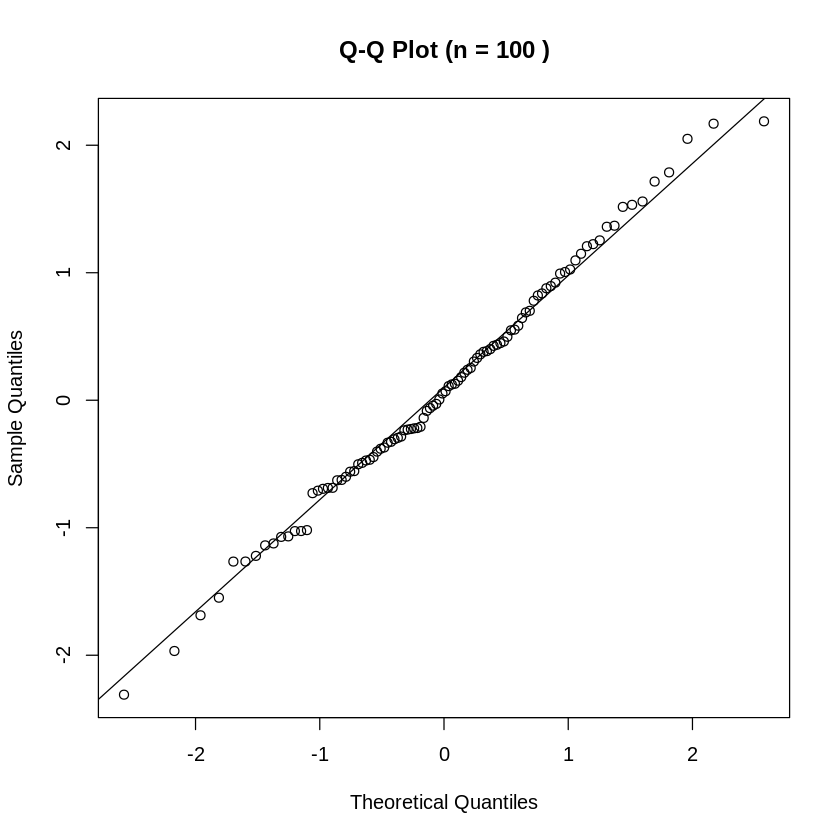

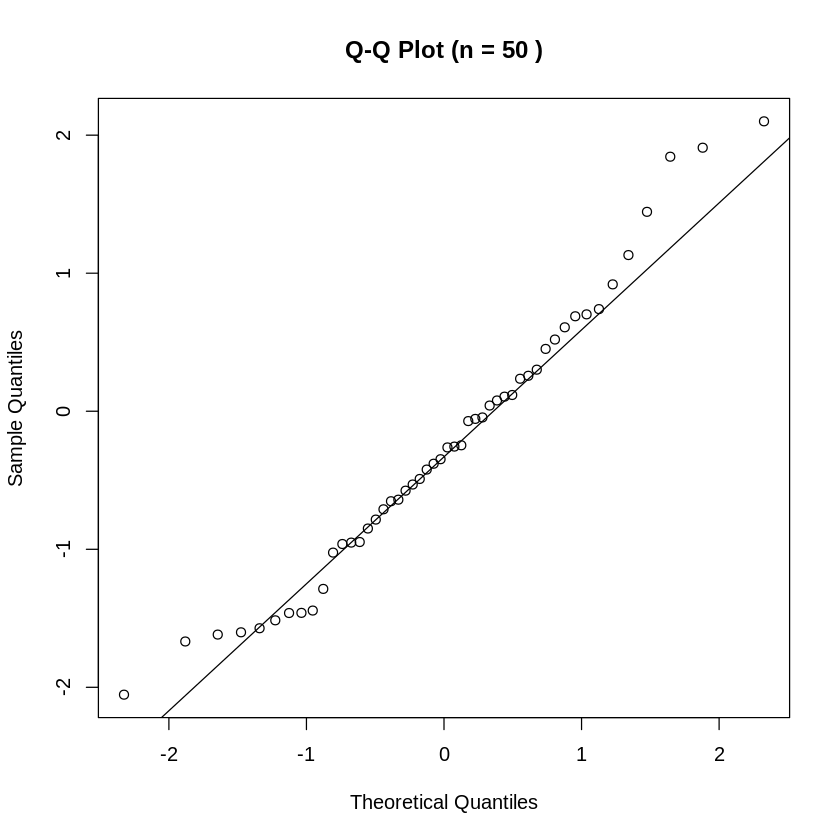

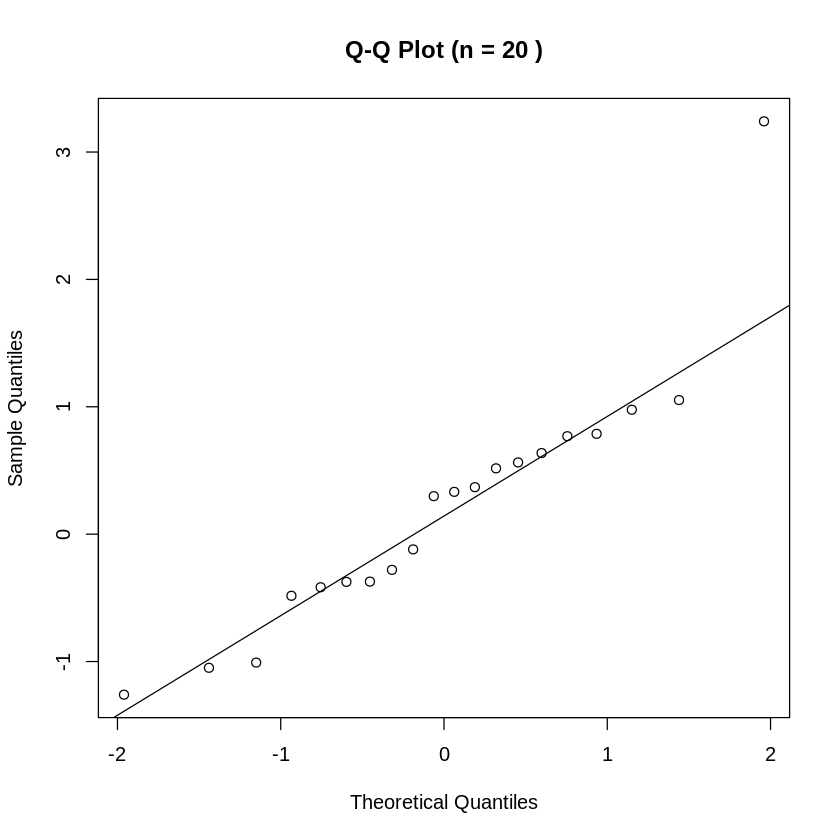

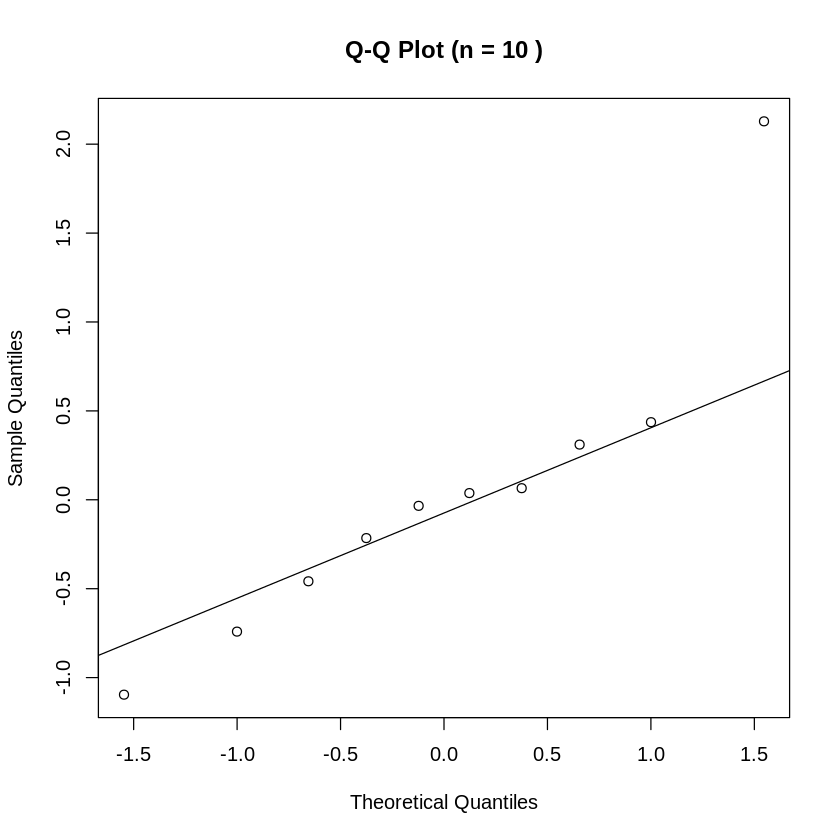

In [ ]:
# Set seed for reproducibility
set.seed(123)

# Function to generate Q-Q plots
generate_qq_plot = function(n) {
  # Generate random data from standard normal distribution
  data = rnorm(n)

  # Create Q-Q plot
  qqnorm(data, main = paste("Q-Q Plot (n =", n, ")"))
  qqline(data)
}

# Generate Q-Q plots for different sample sizes
sample_sizes = c(100, 50, 20, 10)

for (size in sample_sizes) {
  generate_qq_plot(size)
}

### 6
Show that the partial residual plot for a simple linear regression model
is simply a plot of y against x.

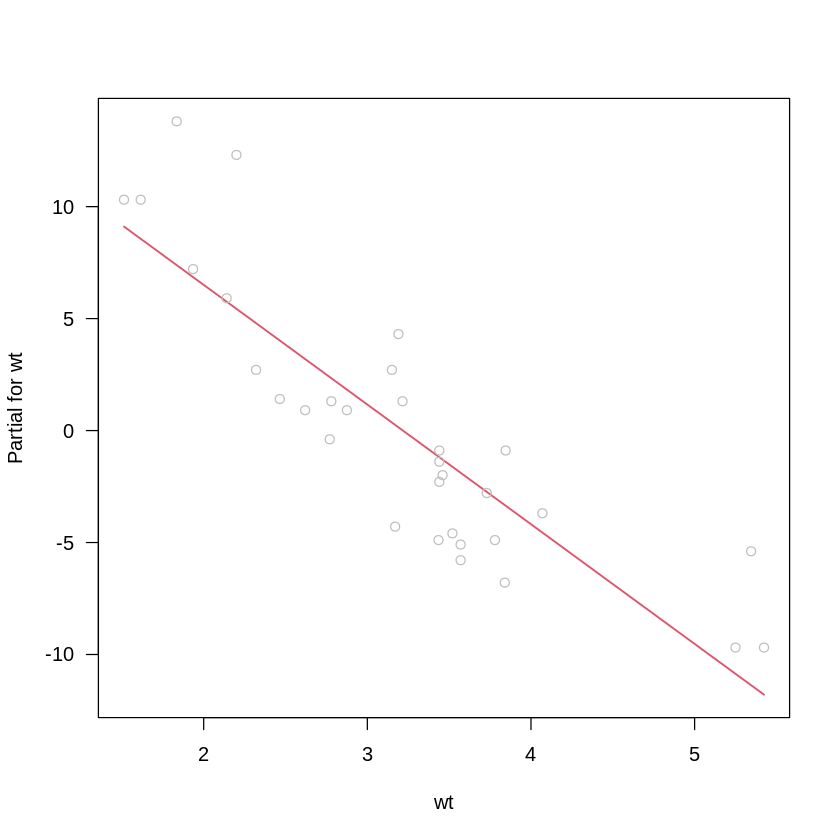

In [ ]:
# Fit a simple linear regression model
model = lm(mpg ~ wt, data = mtcars)

partial.resid = resid(model, type="partial")
termplot(model, partial.resid = TRUE, terms = "wt", las = 1)

### 7
For the naval hospital data (data set: nhospital) (Example 3.18, p. 136),
fit the three models that contain two of the explanatory variables. Show that
the fitted values are very similar for all three models.

In [ ]:
data(nhospital)
nhospital

Cases,Eligible,OpRooms,MainHours
<int>,<dbl>,<int>,<dbl>
89,25.5,4,304.37
513,294.3,11,2616.32
231,83.7,4,1139.12
68,30.7,2,285.43
319,129.8,6,1413.77
276,180.8,6,1555.68
82,43.4,4,383.78
427,165.2,10,2174.27
193,74.3,4,845.30


In [ ]:
nh.m1 = lm( MainHours ~ Eligible + OpRooms, data=nhospital)
nh.m2 = lm( MainHours ~ Eligible + Cases, data=nhospital)
nh.m3 = lm( MainHours ~ OpRooms + Cases, data=nhospital)

# Compare fitted values
fitted_values_model1 = fitted(nh.m1)
fitted_values_model2 = fitted(nh.m2)
fitted_values_model3 = fitted(nh.m3)

# Check the similarity of the fitted values
cor(fitted_values_model1, fitted_values_model2)
cor(fitted_values_model1, fitted_values_model3)
cor(fitted_values_model2, fitted_values_model3)

[1] 0.9831077

[1] 0.9847276

[1] 0.9903112

### 8

The lung capacity data [21] in Example 1.1 (data set: lungcap) have
been used often in Chaps. 2 and 3.
1. Fit the model with fev as the response and smoking status as the only
explanatory variable. Interpret the meaning of the coefficient for smoking.
2. Fit the model with fev as the response and all other variables as explanatory variables (but do not use any interactions). Interpret the coefficient
for smoking status.
3. Fit the model with the logarithm of fev as the response and all other
variables as explanatory variables (but do not use any interactions). Interpret the coefficient for smoking status.
4. Determine a suitable model for the data.

In [ ]:
data(lungcap)
lungcap$Smoke = factor(lungcap$Smoke, levels=c(0, 1), labels=c("Non-smoker","Smoker"))
head(lungcap)

,Age,FEV,Ht,Gender,Smoke
,<int>,<dbl>,<dbl>,<fct>,<fct>
1,3,1.072,46,F,Non-smoker
2,4,0.839,48,F,Non-smoker
3,4,1.102,48,F,Non-smoker
4,4,1.389,48,F,Non-smoker
5,4,1.577,49,F,Non-smoker
6,4,1.418,49,F,Non-smoker


In [ ]:
# 1
lc.m1 = lm(FEV ~ factor(Smoke), data=lungcap)
summary(lc.m1)


Call:
lm(formula = FEV ~ factor(Smoke), data = lungcap)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7751 -0.6339 -0.1021  0.4804  3.2269 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2.56614    0.03466  74.037  < 2e-16 ***
factor(Smoke)Smoker  0.71072    0.10994   6.464 1.99e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8412 on 652 degrees of freedom
Multiple R-squared:  0.06023,	Adjusted R-squared:  0.05879 
F-statistic: 41.79 on 1 and 652 DF,  p-value: 1.993e-10


In [ ]:
# 2
lc.m2 = lm(FEV ~ ., data=lungcap)
summary(lc.m2)


Call:
lm(formula = FEV ~ ., data = lungcap)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.37656 -0.25033  0.00894  0.25588  1.92047 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.456974   0.222839 -20.001  < 2e-16 ***
Age          0.065509   0.009489   6.904 1.21e-11 ***
Ht           0.104199   0.004758  21.901  < 2e-16 ***
GenderM      0.157103   0.033207   4.731 2.74e-06 ***
SmokeSmoker -0.087246   0.059254  -1.472    0.141    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4122 on 649 degrees of freedom
Multiple R-squared:  0.7754,	Adjusted R-squared:  0.774 
F-statistic:   560 on 4 and 649 DF,  p-value: < 2.2e-16


In [ ]:
# 3
lc.m3 = lm(log(FEV) ~ ., data=lungcap)
summary(lc.m3)


Call:
lm(formula = log(FEV) ~ ., data = lungcap)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63278 -0.08657  0.01146  0.09540  0.40701 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.943998   0.078639 -24.721  < 2e-16 ***
Age          0.023387   0.003348   6.984  7.1e-12 ***
Ht           0.042796   0.001679  25.489  < 2e-16 ***
GenderM      0.029319   0.011719   2.502   0.0126 *  
SmokeSmoker -0.046068   0.020910  -2.203   0.0279 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1455 on 649 degrees of freedom
Multiple R-squared:  0.8106,	Adjusted R-squared:  0.8095 
F-statistic: 694.6 on 4 and 649 DF,  p-value: < 2.2e-16


In [ ]:
anova(lc.m3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Age,1,43.2100549,43.21005487,2041.956379,1.330646e-202
Ht,1,15.3262790,15.32627897,724.266452,1.013797e-107
Gender,1,0.1533136,0.15331357,7.245064,7.292881e-03
Smoke,1,0.1027098,0.10270983,4.853708,2.793739e-02
Residuals,649,13.7335576,0.02116111,NA,NA


### 9

In Chap. 2, the lung capacity data (data set: lungcap) was analysed
using log(FEV) as the response variable, with Ht as one of the explanatory
variables. In Example 3.13, a model was proposed for analysing log(FEV)
using log(Ht) in place of Ht as one of the covariates. Compare these two
models using a diagnostic analysis, and comment.

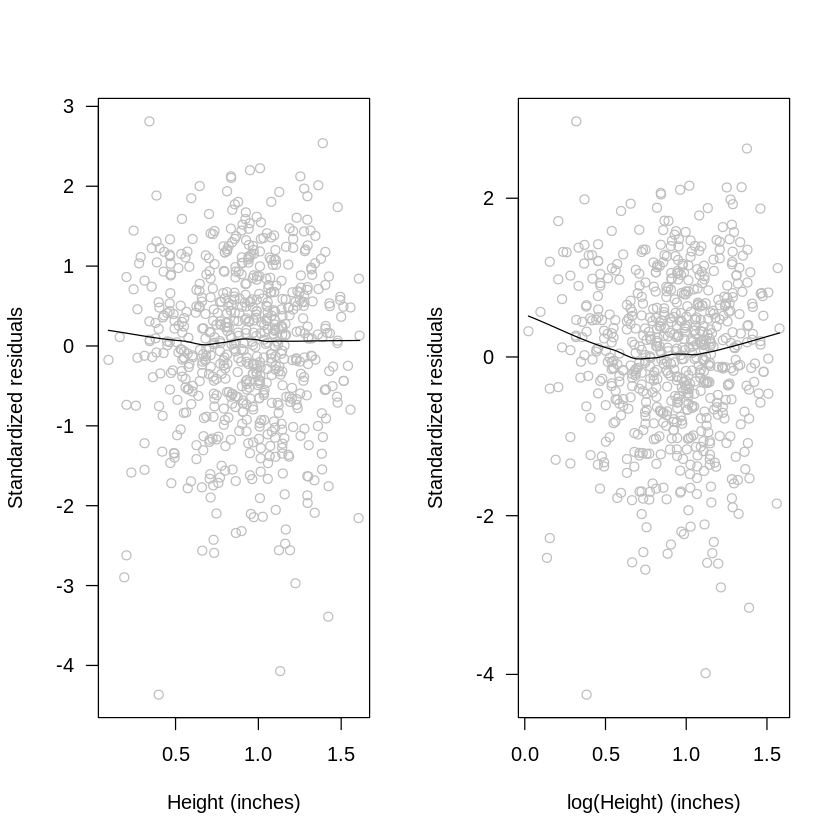

In [ ]:
lc.m1 = lm(log(FEV) ~ Age + Ht + Gender + Smoke, data = lungcap)
lc.m2 = lm(log(FEV) ~ Age + log(Ht) + Gender + Smoke, data = lungcap)

par(mfrow=c(1,2))

# Compare two residuals with Ht variable
scatter.smooth(rstandard(lc.m1) ~ fitted(lc.m1), col="grey", las=1, ylab="Standardized residuals", xlab="Height (inches)")

scatter.smooth(rstandard(lc.m2) ~ fitted(lc.m2), col="grey", las=1, ylab="Standardized residuals", xlab="log(Height) (inches)")

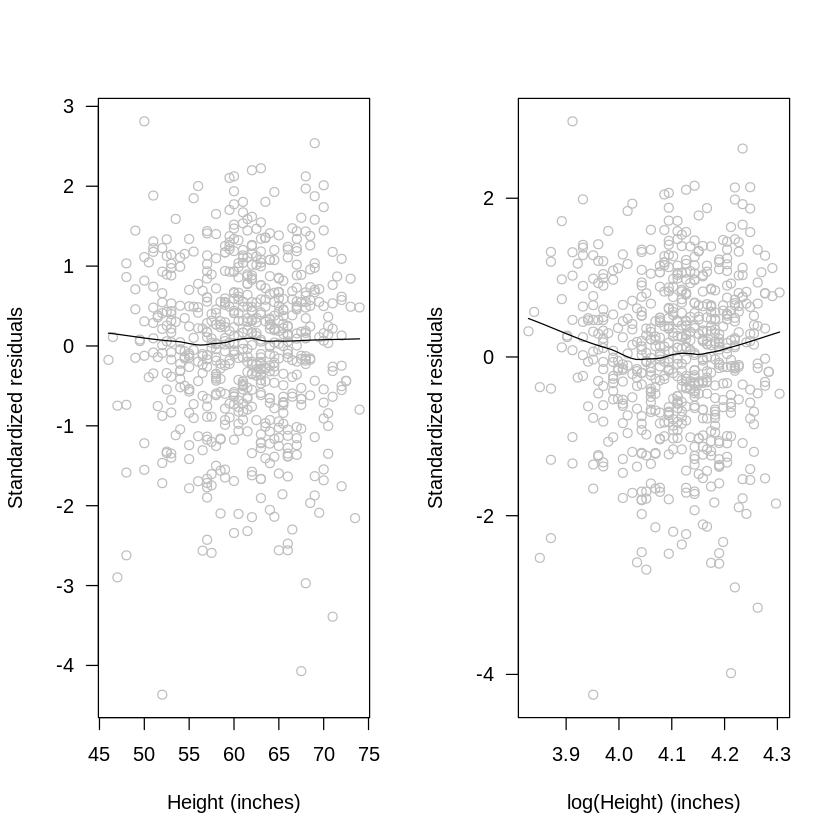

In [ ]:
par(mfrow=c(1,2))

scatter.smooth(rstandard(lc.m1) ~ lungcap$Ht, col="grey", las=1, ylab="Standardized residuals", xlab="Height (inches)")
scatter.smooth(rstandard(lc.m2) ~ log(lungcap$Ht), col="grey", las=1, ylab="Standardized residuals", xlab="log(Height) (inches)")

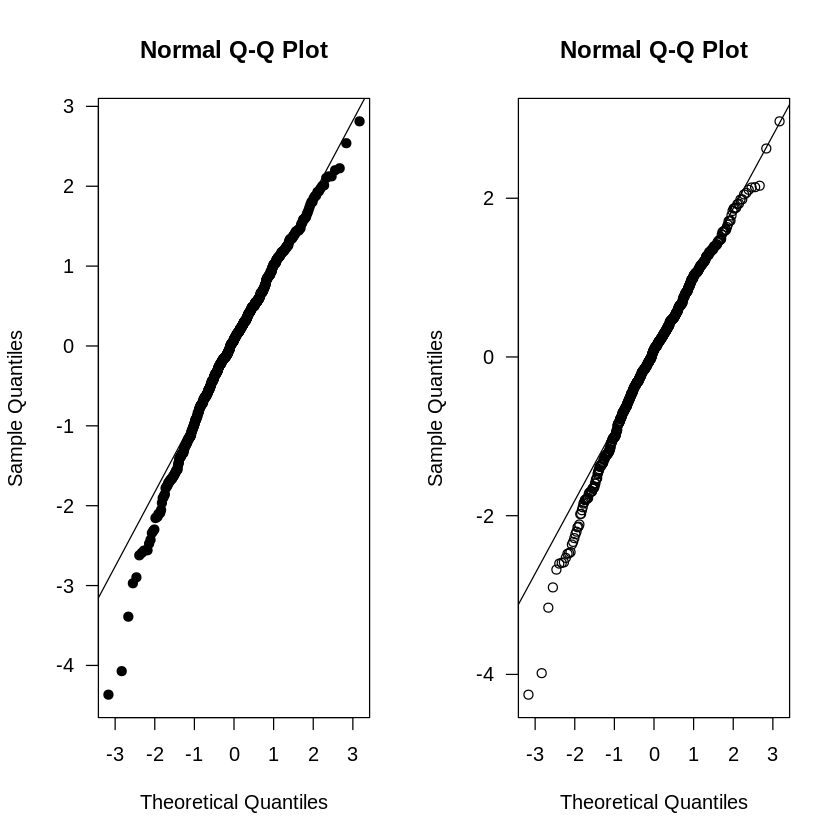

In [ ]:
par(mfrow=c(1, 2))

# Q-Q plot for model 1
qqnorm(rstandard(lc.m1), las=1, pch=19)
qqline(rstandard(lc.m1))

# Q-Q plot for model 2
qqnorm(rstandard(lc.m2), las=1, pch=1)
qqline(rstandard(lc.m2))

### 10

In Sect. 3.15.2 (p. 141), a model is fitted to the cheese tasting data
(data set: cheese). However, before fitting this model, the plot of Taste
against log(H2S) suggested slightly non-constant variance. An alternative
model might suggest using log(Taste) as the response rather than Taste.
Show that using log(Taste) as the response results in a poor model.

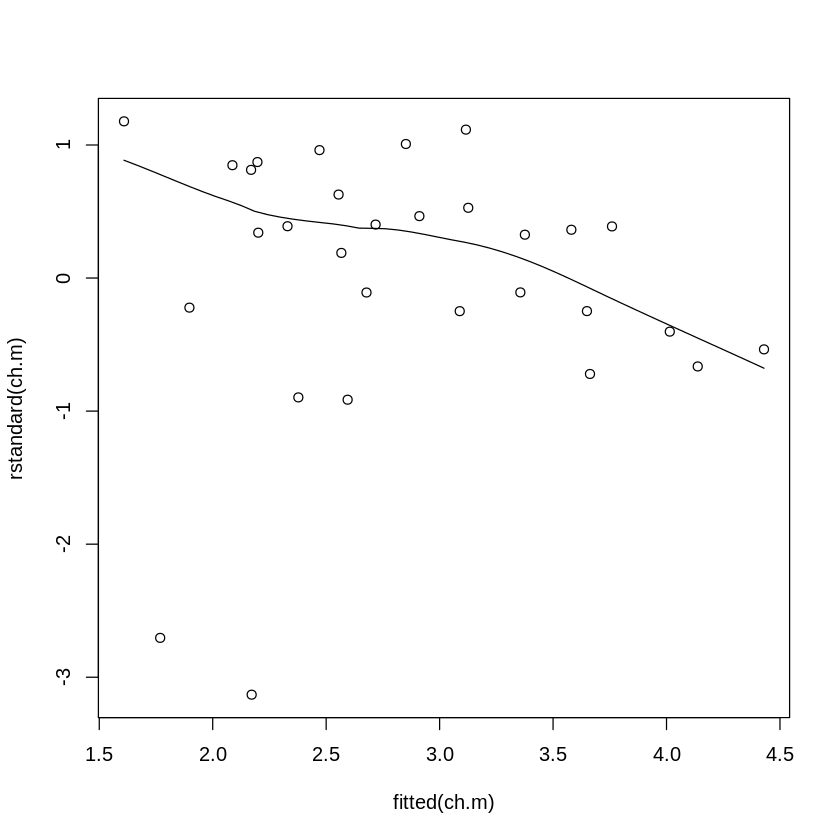

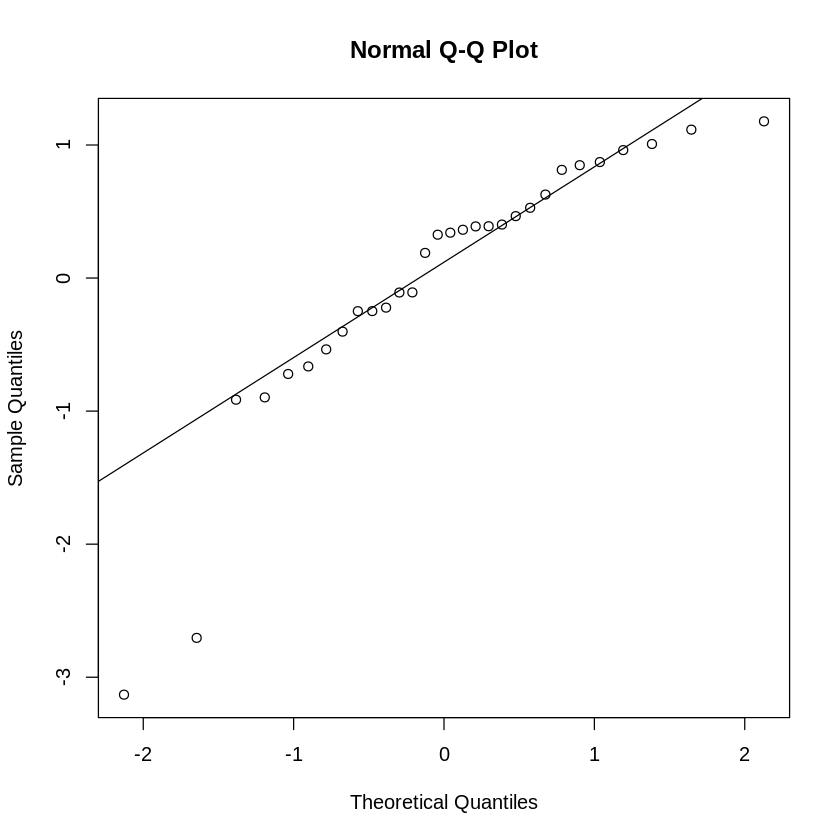

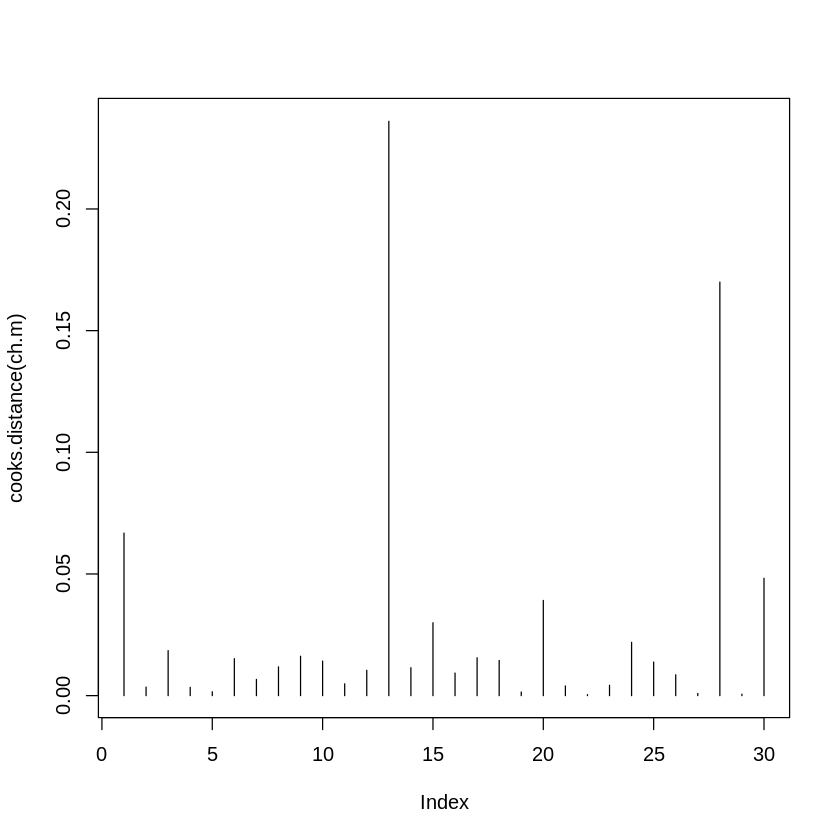

In [ ]:
data(cheese)
ch.m = lm(log(Taste) ~ log(H2S) + Lactic + Acetic, data=cheese)

scatter.smooth(rstandard(ch.m) ~ fitted(ch.m) )
qqnorm(rstandard(ch.m)); qqline(rstandard(ch.m))
plot(cooks.distance(ch.m), type="h")

### 11

A study [27] compiled information about the food consumption habits
of various fish species (data set: fishfood). The fitted linear regression model
has the form

log ˆμ = β0 + β1 log MaxWt + β2 log Temp + β3 log AR + β4Food,

where μ = E[FoodCon] is the predicted daily food consumption as a percentage of biomass, F = 0 for carnivores, and F = 1 for herbivores, and the other
variables are defined in Table 3.7.
1. Fit the model used in original study.
2. Perform a diagnostic analysis of this model.
3. Interpret the model.
4. Determine if a better model can be found by considering interaction
terms

In [ ]:
data(fishfood)
head(fishfood)

,Species,MaxWt,Temp,AR,Food,FoodCon
,<fct>,<int>,<int>,<dbl>,<fct>,<dbl>
1,Brevoortia patronus,362,25,1.69,C,2.22
2,Brevoortia tyrannus,1216,18,2.31,H,8.61
3,Engraulis encrasicholus,28,15,1.42,C,2.50
4,Hygophum proximum,2,25,1.65,C,9.28
5,Hygophum reindhardtii,1,25,1.05,C,6.66
6,Lampanyctus alatus,2,25,1.62,C,3.32


In [ ]:
# 1
m1 <- lm(log(FoodCon) ~ log(MaxWt) + log(Temp) + log(AR) + Food, data=fishfood)
anova(m1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(MaxWt),1,14.240683,14.2406829,50.93964,9.120953e-08
log(Temp),1,5.156741,5.1567406,18.44592,1.897211e-04
log(AR),1,3.367067,3.3670667,12.04417,1.702149e-03
Food,1,5.754924,5.7549235,20.58565,9.819961e-05
Residuals,28,7.827678,0.2795599,NA,NA


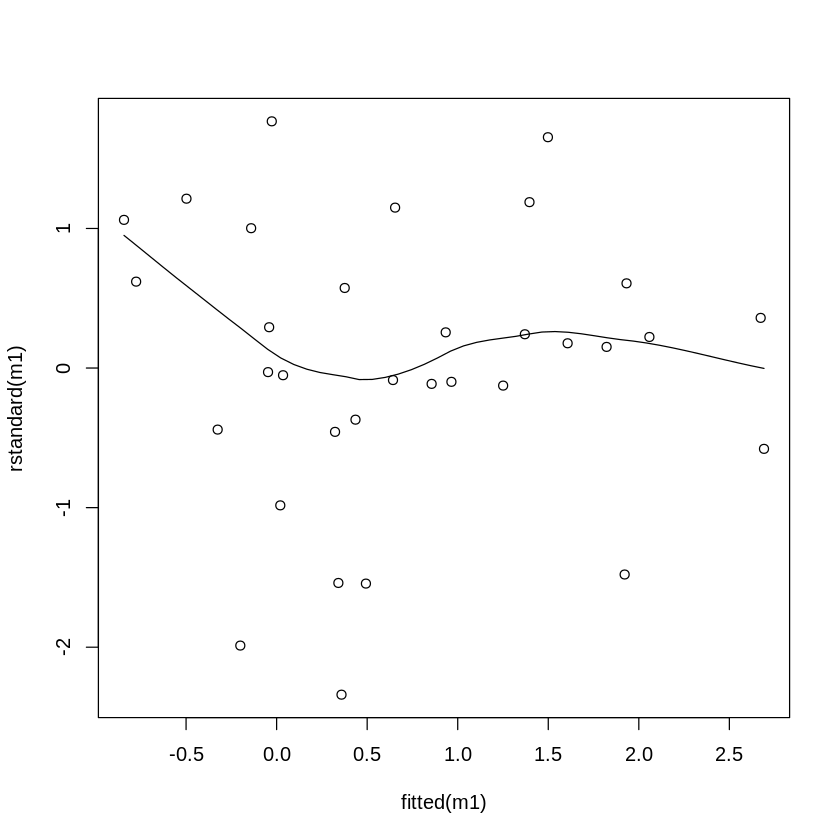

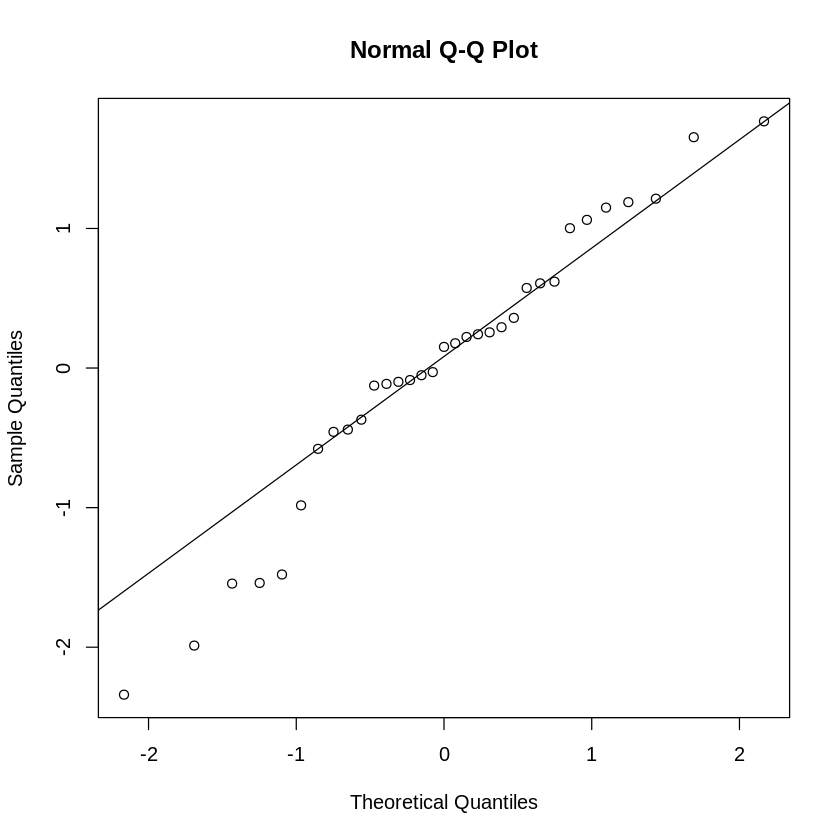

In [ ]:
# 2
scatter.smooth(rstandard(m1) ~ fitted(m1))
qqnorm(rstandard(m1))
qqline(rstandard(m1))

In [ ]:
# 3
summary(m1)


Call:
lm(formula = log(FoodCon) ~ log(MaxWt) + log(Temp) + log(AR) + 
    Food, data = fishfood)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.17929 -0.21921  0.07409  0.29573  0.86831 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.27801    1.06856  -0.260   0.7966    
log(MaxWt)  -0.20962    0.03441  -6.091 1.43e-06 ***
log(Temp)    0.64385    0.33294   1.934   0.0633 .  
log(AR)      0.56505    0.21357   2.646   0.0132 *  
FoodH        1.49143    0.32872   4.537 9.82e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5287 on 28 degrees of freedom
Multiple R-squared:  0.7846,	Adjusted R-squared:  0.7539 
F-statistic:  25.5 on 4 and 28 DF,  p-value: 5.533e-09


In [ ]:
# 4
m2 = update(m1, . ~ log(MaxWt) * log(Temp) * Food * log(AR))
m3 = step(m2)

Start:  AIC=-38.89
log(FoodCon) ~ log(MaxWt) + log(Temp) + Food + log(AR) + log(MaxWt):log(Temp) + 
    log(MaxWt):Food + log(Temp):Food + log(MaxWt):log(AR) + log(Temp):log(AR) + 
    Food:log(AR) + log(MaxWt):log(Temp):Food + log(MaxWt):log(Temp):log(AR) + 
    log(MaxWt):Food:log(AR) + log(Temp):Food:log(AR) + log(MaxWt):log(Temp):Food:log(AR)


Step:  AIC=-38.89
log(FoodCon) ~ log(MaxWt) + log(Temp) + Food + log(AR) + log(MaxWt):log(Temp) + 
    log(MaxWt):Food + log(Temp):Food + log(MaxWt):log(AR) + log(Temp):log(AR) + 
    Food:log(AR) + log(MaxWt):log(Temp):Food + log(MaxWt):log(Temp):log(AR) + 
    log(MaxWt):Food:log(AR) + log(Temp):Food:log(AR)


Step:  AIC=-38.89
log(FoodCon) ~ log(MaxWt) + log(Temp) + Food + log(AR) + log(MaxWt):log(Temp) + 
    log(MaxWt):Food + log(Temp):Food + log(MaxWt):log(AR) + log(Temp):log(AR) + 
    Food:log(AR) + log(MaxWt):log(Temp):Food + log(MaxWt):log(Temp):log(AR) + 
    log(MaxWt):Food:log(AR)


Step:  AIC=-38.89
log(FoodCon) ~ log(MaxWt) + 

In [ ]:
anova(m1, m3) # Model m3 a bit better

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,28,7.827678,NA,NA,NA,NA
2,26,5.660281,2,2.167397,4.977873,0.0147797


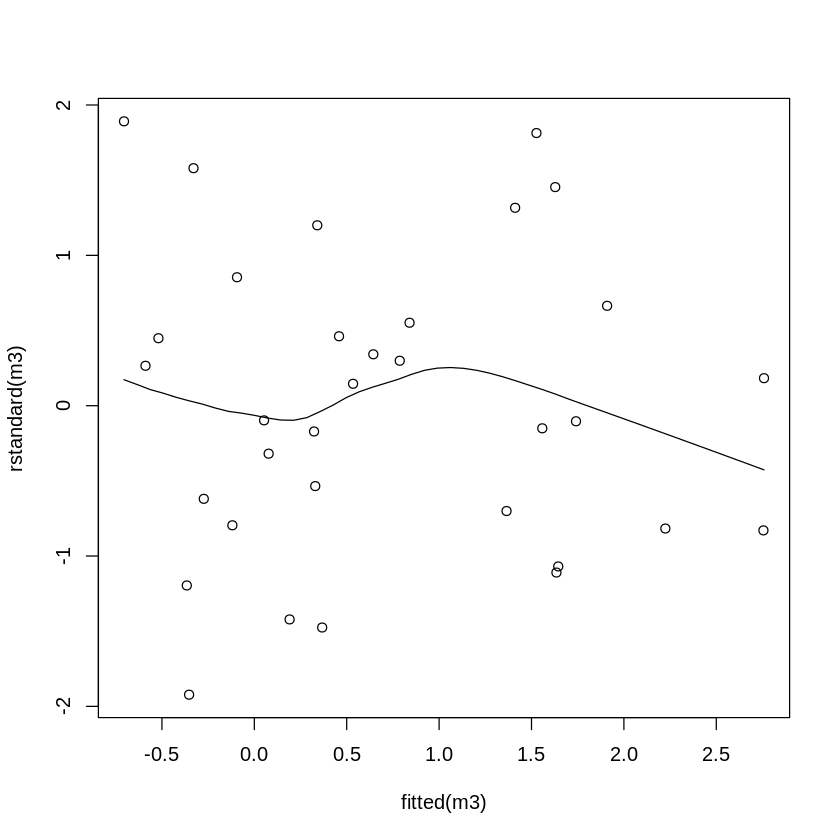

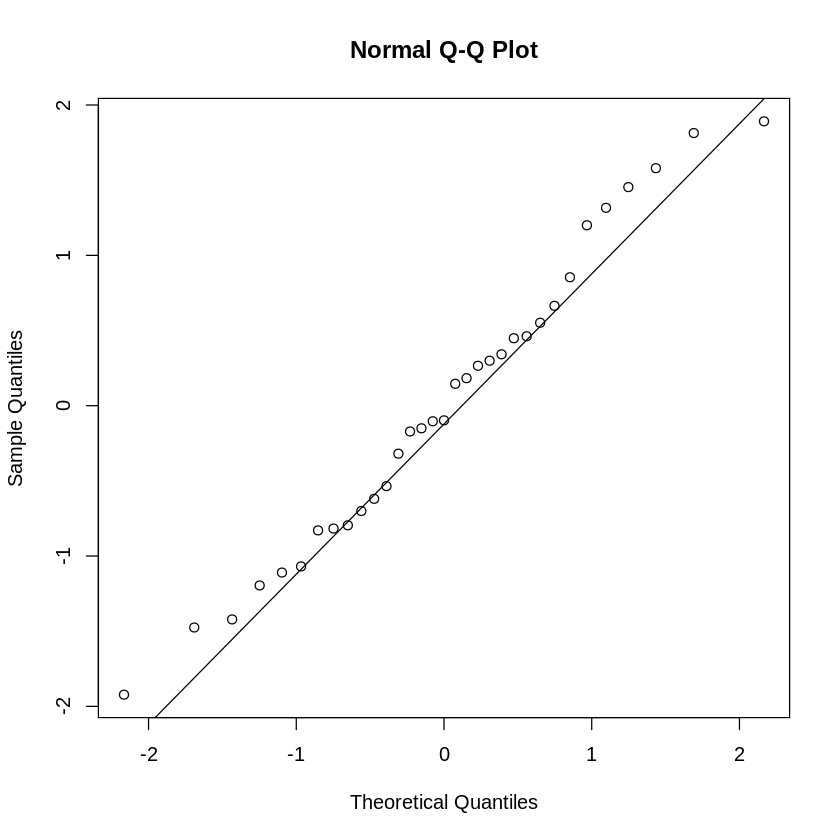

In [ ]:
scatter.smooth(rstandard(m3) ~ fitted(m3))
qqnorm(rstandard(m3))
qqline(rstandard(m3))

### 12

In a study [24] of the feed of ruminants, the data in Table 3.8 were
collected (data set: ruminant). The purpose of the study was to model the
digestible energy content, and explore the relationships with percentage dry
matter digestibility and percentage energy digestibility.
1. Plot the digestible energy content against the other two variables, and
comment on the relationships.
2. Compute the correlations between the three variables, and comment.
3. Fit a suitable simple linear regression model.
4. Perform a diagnostic analysis. In particular, one observation is different to
the others: does the observation have a large residual or a high leverage?


In [ ]:
data(ruminant)
head(ruminant)

,DryMatterDigest,EnergyDigest,Energy
,<dbl>,<dbl>,<dbl>
1,30.5,27.8,1.243
2,63.0,61.5,2.750
3,62.8,60.4,2.701
4,50.0,49.5,2.213
5,60.3,58.7,2.681
6,64.1,63.0,2.877


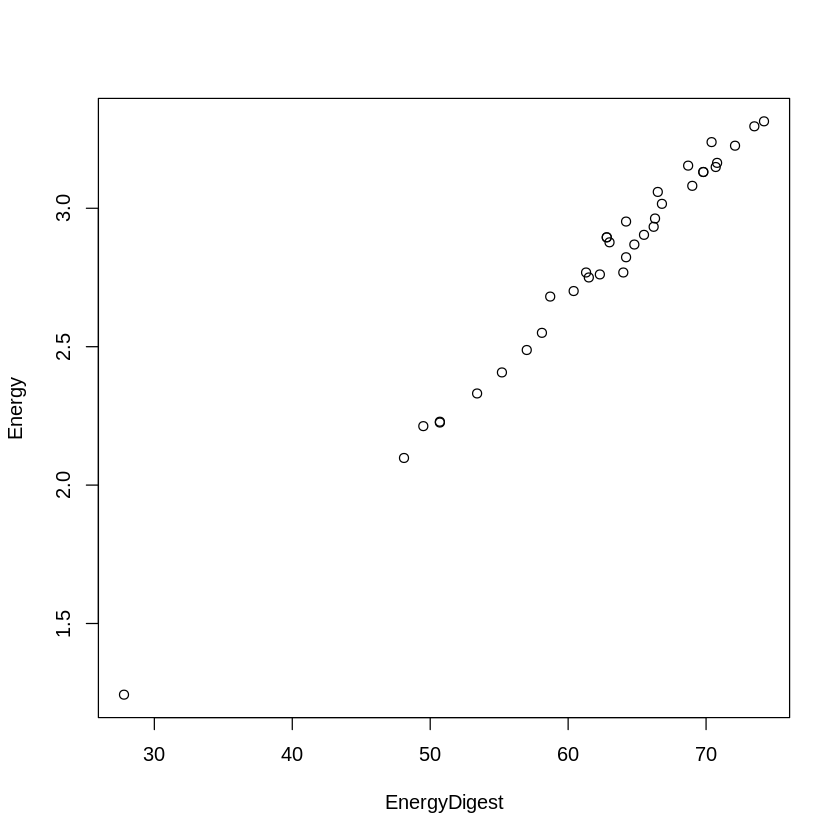

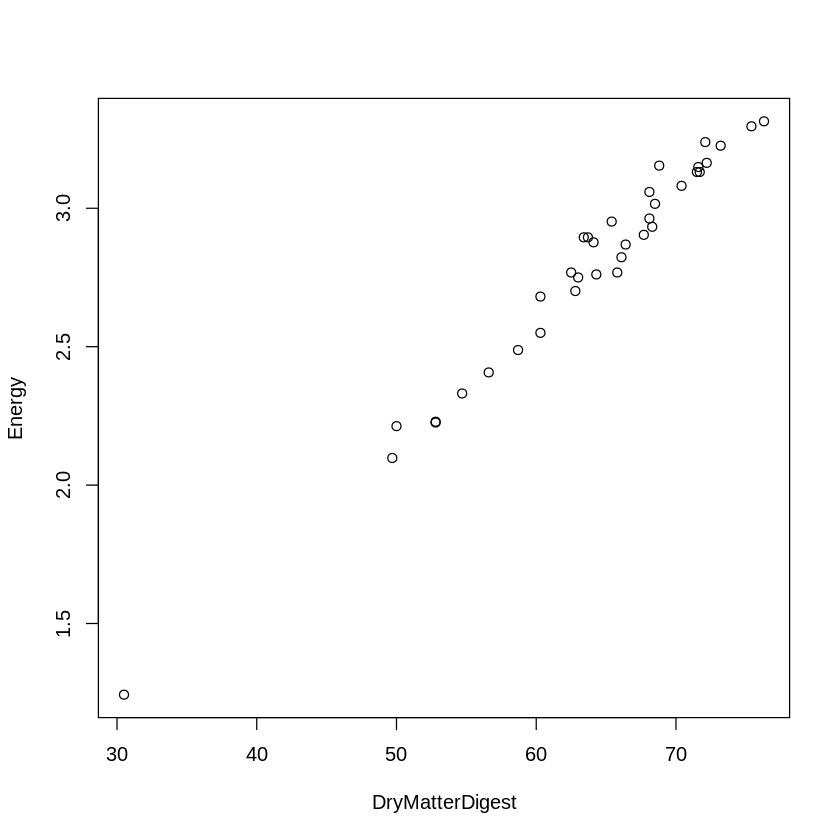

In [ ]:
# 1
# scatter.smooth(ruminant$Energy ~ ruminant$EnergyDigest)
# scatter.smooth(ruminant$Energy ~ ruminant$DryMatterDigest)

plot(Energy ~ EnergyDigest, data=ruminant)
plot(Energy ~ DryMatterDigest, data=ruminant)

In [ ]:
# 2
cor(ruminant)

,DryMatterDigest,EnergyDigest,Energy
DryMatterDigest,1.0000000,0.9982228,0.9891837
EnergyDigest,0.9982228,1.0000000,0.9937236
Energy,0.9891837,0.9937236,1.0000000


In [ ]:
# 3
ru.m = lm(Energy ~ ., data = ruminant)
summary(ru.m)


Call:
lm(formula = Energy ~ ., data = ruminant)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.090024 -0.028673 -0.006308  0.027092  0.084507 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.003503   0.062461  -0.056   0.9556    
DryMatterDigest -0.036844   0.014017  -2.629   0.0129 *  
EnergyDigest     0.082592   0.013838   5.968 1.06e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04429 on 33 degrees of freedom
Multiple R-squared:  0.9897,	Adjusted R-squared:  0.989 
F-statistic:  1578 on 2 and 33 DF,  p-value: < 2.2e-16


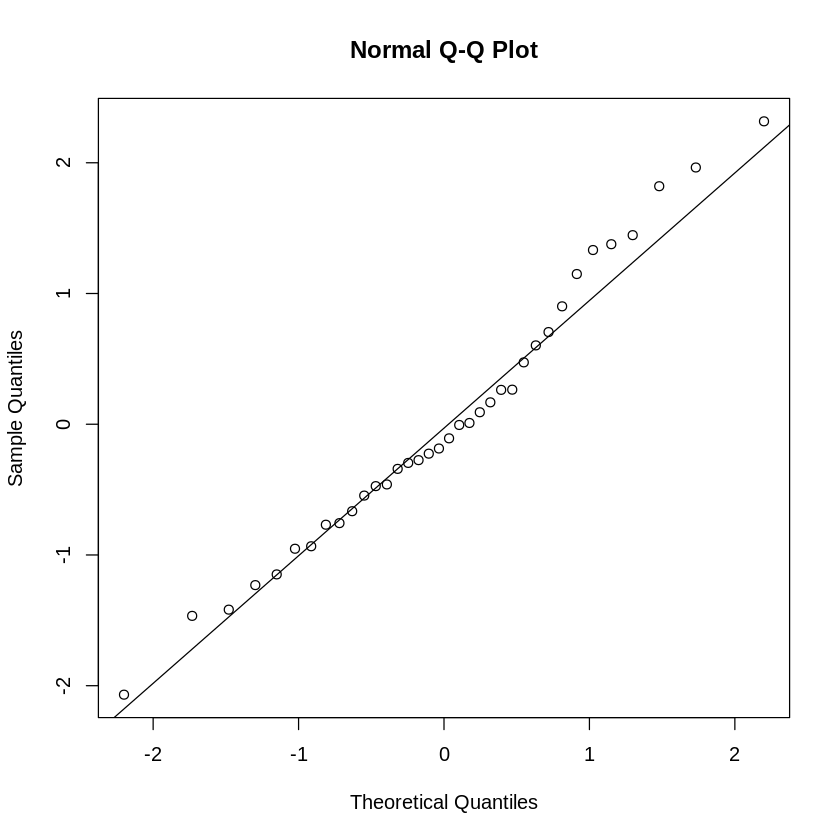

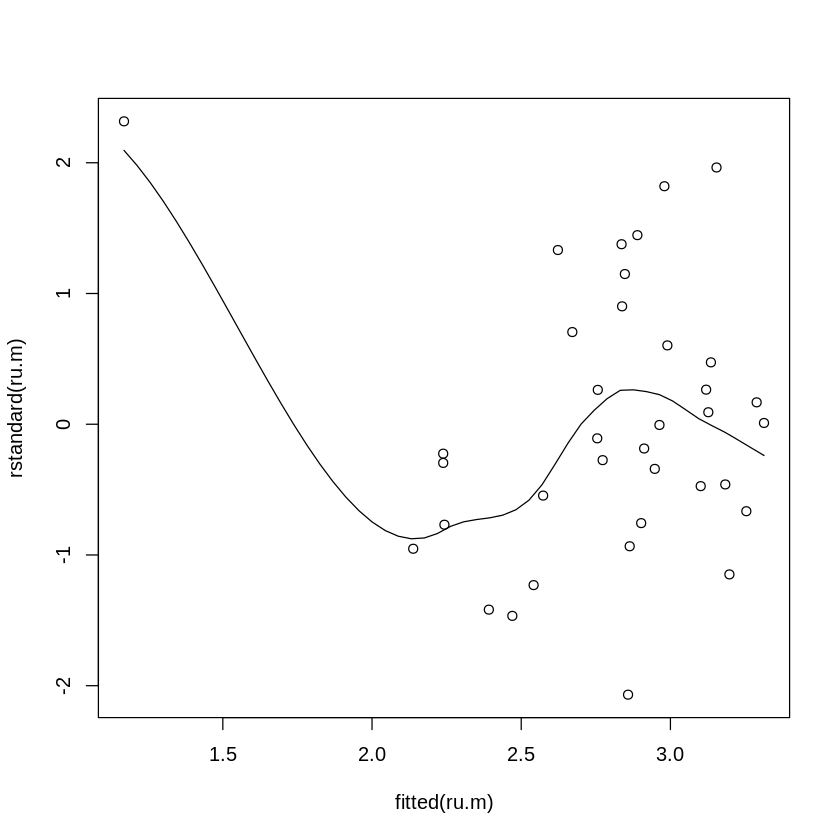

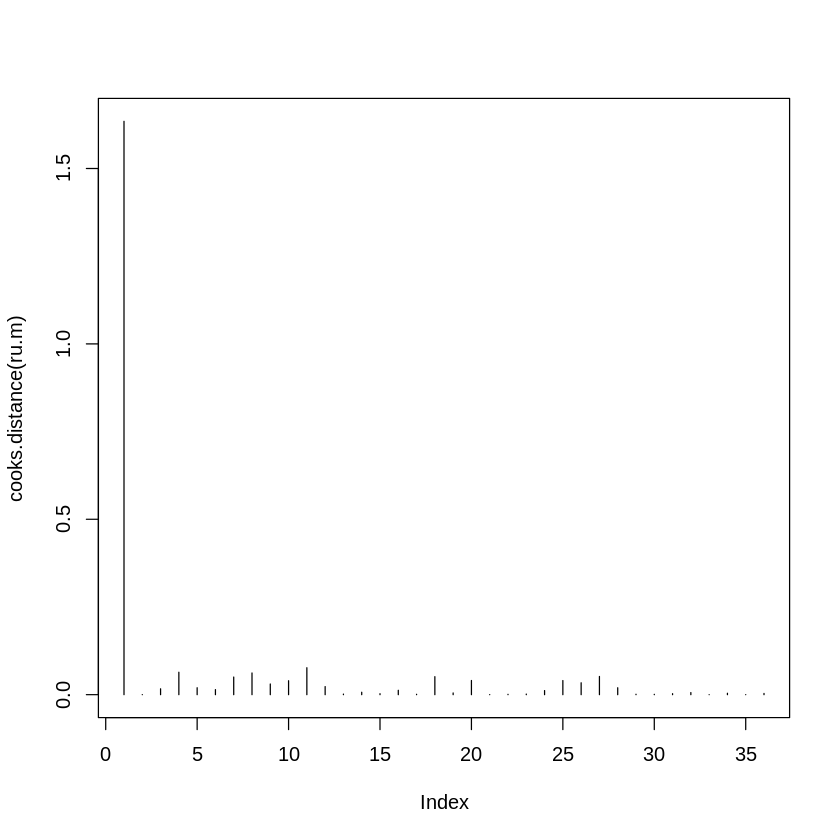

In [ ]:
# 4

# Q-Q plot
qqnorm(rstandard(ru.m)); qqline(rstandard(ru.m))

# residual against mu
scatter.smooth(rstandard(ru.m) ~ fitted(ru.m))

plot(cooks.distance(ru.m), type="h")

### 13

An experiment was conducted [30] to determine how to maximize
meadowfoam flower production. The data and a fuller description are given
in Problem 2.15 (data set: flowers). In that problem, a linear regression
model was fitted to the data.
1. Perform a diagnostic analysis on the fitted linear regression model.
2. Identify any influential observations or outliers.
3. Interpret the final model.


In [ ]:
data(flowers)
head(flowers)

,Flowers,Light,Timing
,<dbl>,<int>,<fct>
1,62.4,150,PFI
2,77.1,150,PFI
3,77.7,150,Before
4,75.4,150,Before
5,55.7,300,PFI
6,54.2,300,PFI



Call:
lm(formula = Flowers ~ ., data = flowers)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.040  -3.930  -1.819   5.587  11.866 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  83.399167   3.289525  25.353  < 2e-16 ***
Light        -0.040490   0.005157  -7.851 1.11e-07 ***
TimingPFI   -12.091667   2.642210  -4.576 0.000164 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.472 on 21 degrees of freedom
Multiple R-squared:  0.7973,	Adjusted R-squared:  0.778 
F-statistic: 41.29 on 2 and 21 DF,  p-value: 5.279e-08


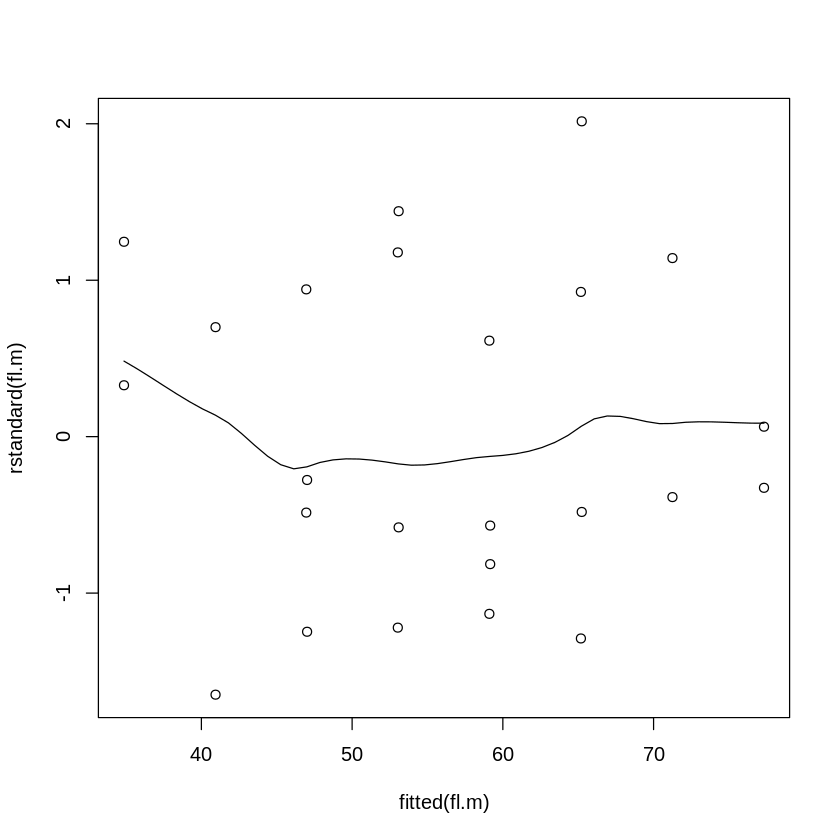

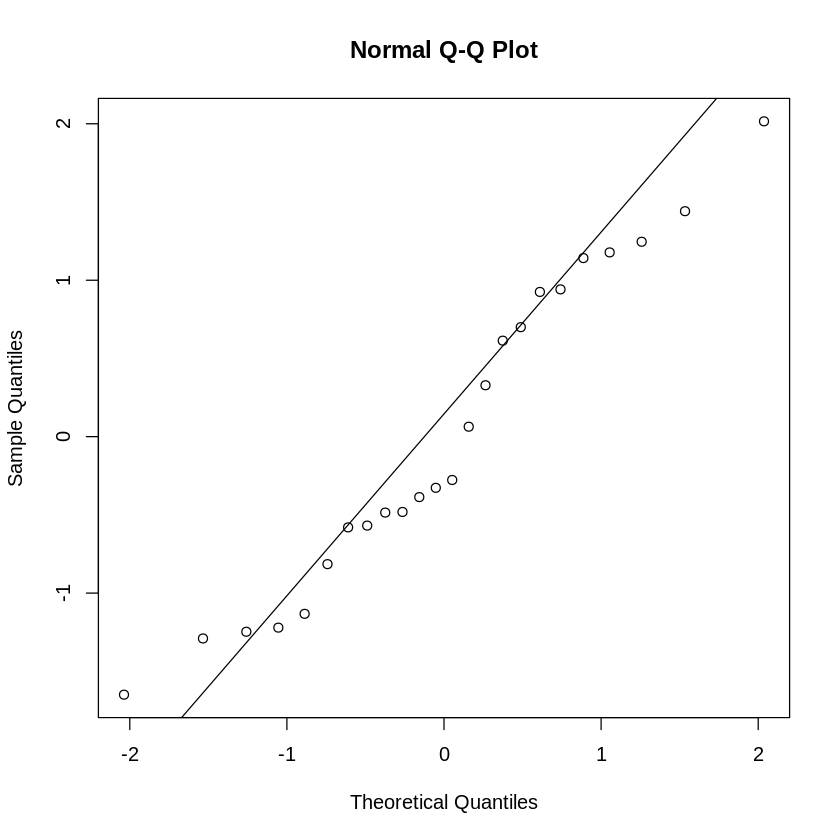

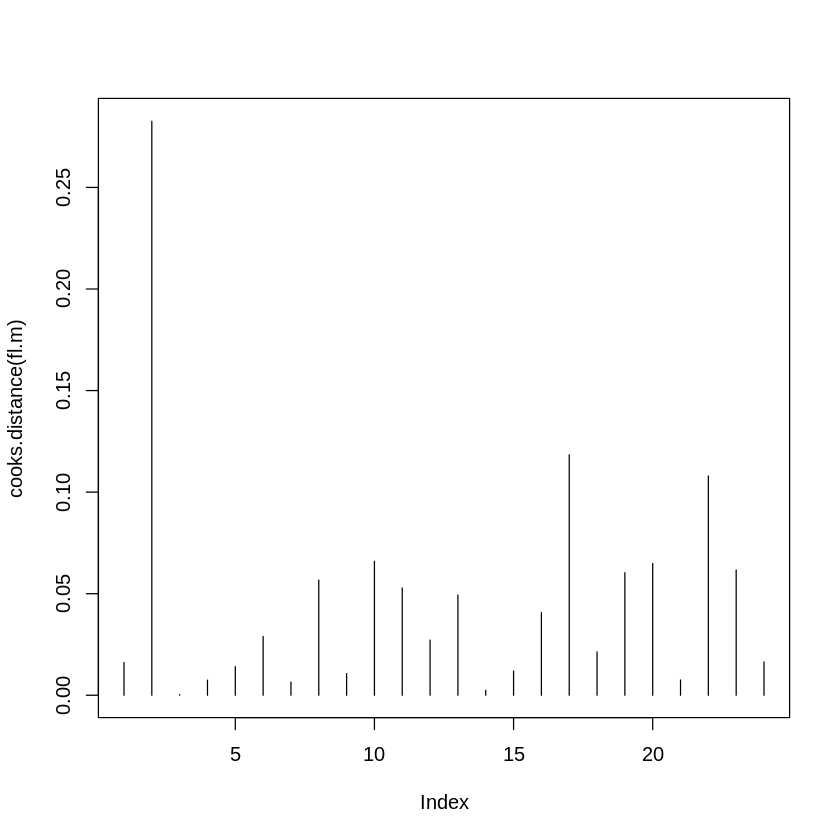

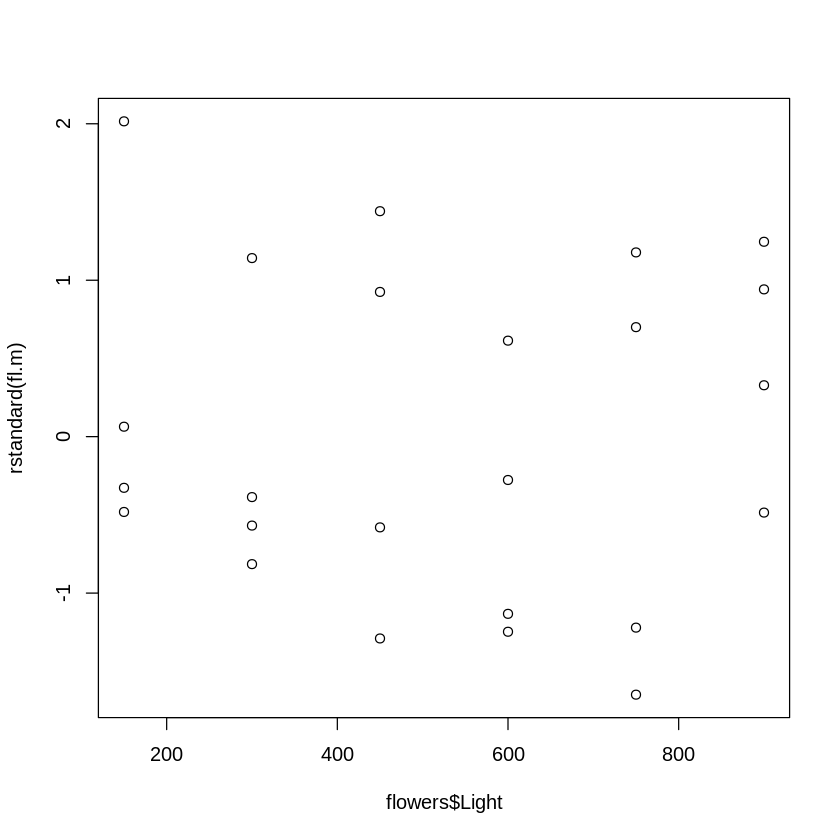

In [ ]:
# 1
fl.m = lm(Flowers ~ ., data = flowers)
summary(fl.m)

scatter.smooth(rstandard(fl.m) ~ fitted(fl.m))
qqnorm(rstandard(fl.m)); qqline(rstandard(fl.m))
plot(cooks.distance(fl.m), type="h")
plot(rstandard(fl.m) ~ flowers$Light)

In [ ]:
# 2
data.frame(colSums(influence.measures(fl.m)$is.inf))

,colSums.influence.measures.fl.m..is.inf.
,<dbl>
dfb.1_,0
dfb.Lght,0
dfb.TPFI,0
dffit,0
cov.r,0
cook.d,0
hat,0


In [ ]:
# 3. No observations reported as influential

### 14

A study [15] of the effect of Manuka honey of the healing of wounds
collected data from 20 wounds from 17 individuals (Table 3.9; data set:
manuka).
1. Plot the percentage reduction in wound size over 2 weeks against the
initial pH.
2. Fit the corresponding regression equation, and draw the regression line
on the plot.
3. Write down the regression model. Interpret the model. (This led to one
of the main conclusions of the paper.)

Later, a retraction notice was issued for the article [16] which stated that:

`
The regression results presented. . . are strongly influenced by a high outlying
value. . .When the results for this patient are omitted, the association is no longer
statistically significant. . . As this relationship is pivotal to the conclusions of the
paper, it is felt that the interests of patient care would be best served by a retraction.`

4. Perform a diagnostic analysis of the model fitted above. Identify the observation that is influential.
5. Refit the regression model without this influential observation, and write
down the model. Interpret the model, and compare to your interpretation
of the previous model.
6. Plot this regression line on the plot generated above. Compare the two
regression lines, and comment.

In [ ]:
data(manuka)

manuka$Reduction = (manuka$Size0 - manuka$Size2) / manuka$Size0 * 100
head(manuka)

,Aetiology,Duration,Size0,Size2,pH0,pH2,Reduction
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,V,52,4.3,4.0,7.26,7.15,6.976744
2,V,52,2.4,1.5,7.63,7.15,37.500000
3,V,52,7.3,2.9,7.63,7.50,60.273973
4,V,2,4.3,1.4,7.18,7.15,67.441860
5,V,52,3.5,0.1,7.75,6.69,97.142857
6,V,12,10.3,6.0,7.94,7.56,41.747573


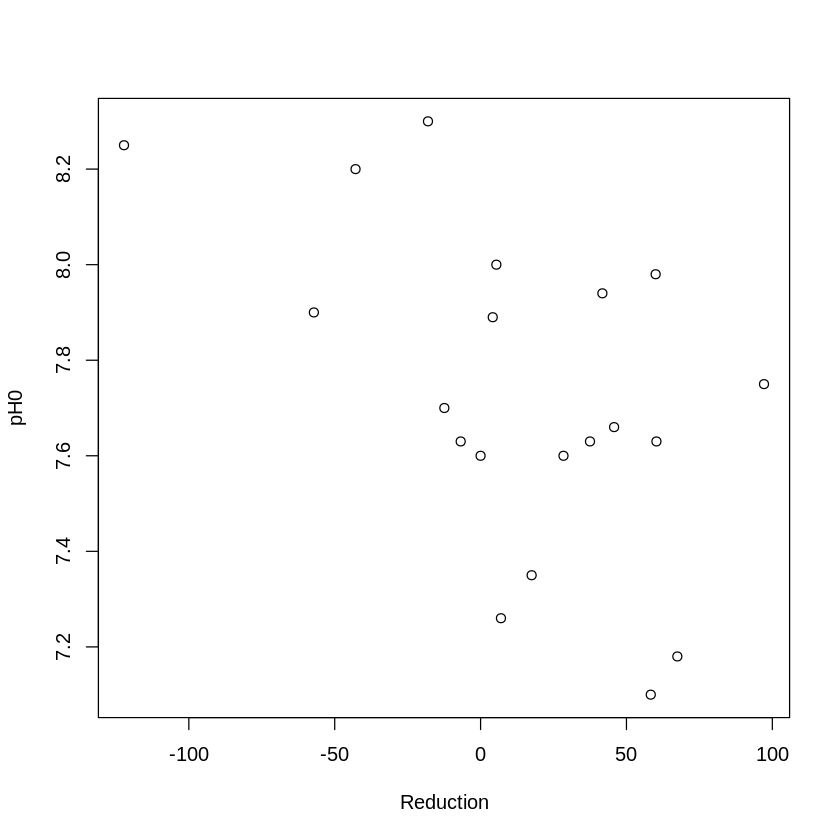

In [ ]:
# 1
plot(pH0 ~ Reduction, data = manuka)


Call:
lm(formula = pH0 ~ Reduction, data = manuka)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49146 -0.17296  0.00897  0.24891  0.45752 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.77685    0.06807 114.245   <2e-16 ***
Reduction   -0.00364    0.00134  -2.717   0.0141 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2934 on 18 degrees of freedom
Multiple R-squared:  0.2908,	Adjusted R-squared:  0.2514 
F-statistic: 7.382 on 1 and 18 DF,  p-value: 0.01413


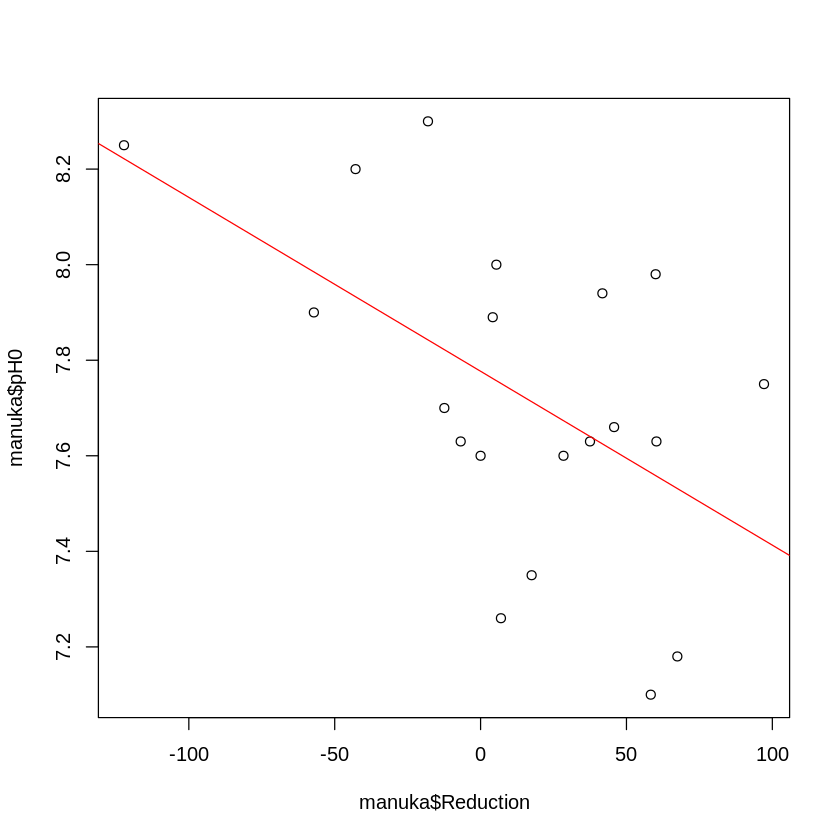

In [ ]:
# 2
ma.m1 <- lm(pH0 ~ Reduction, data = manuka)
summary(ma.m1)

# scatter.smooth(rstandard(ma.m1) ~ fitted(ma.m1))
plot(manuka$pH0 ~ manuka$Reduction)
abline(ma.m1, col = "red")

In [ ]:
# 3. Explain

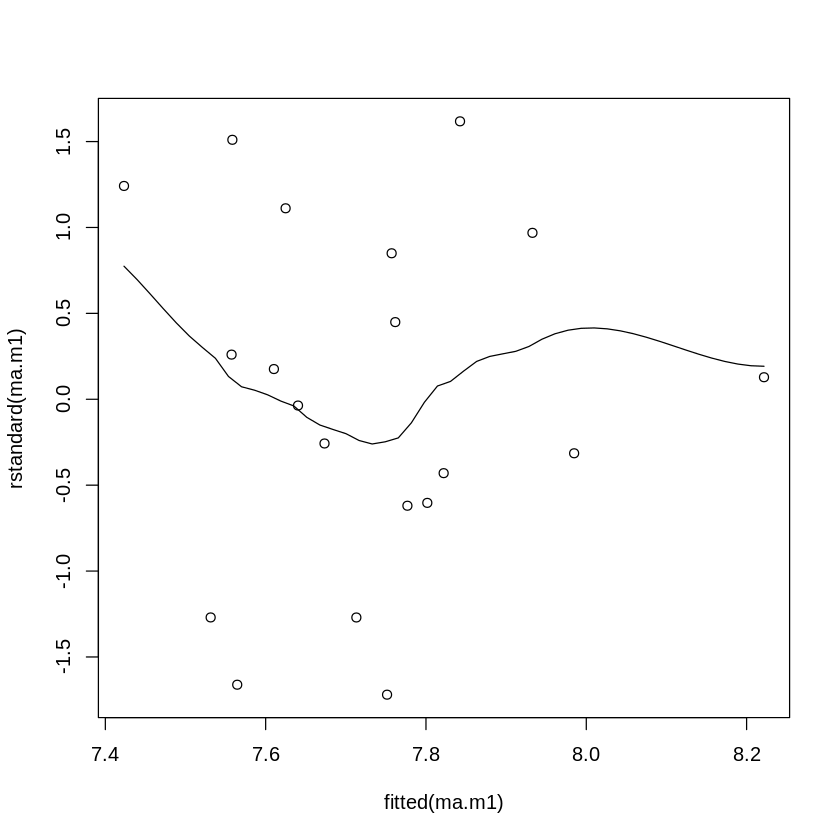

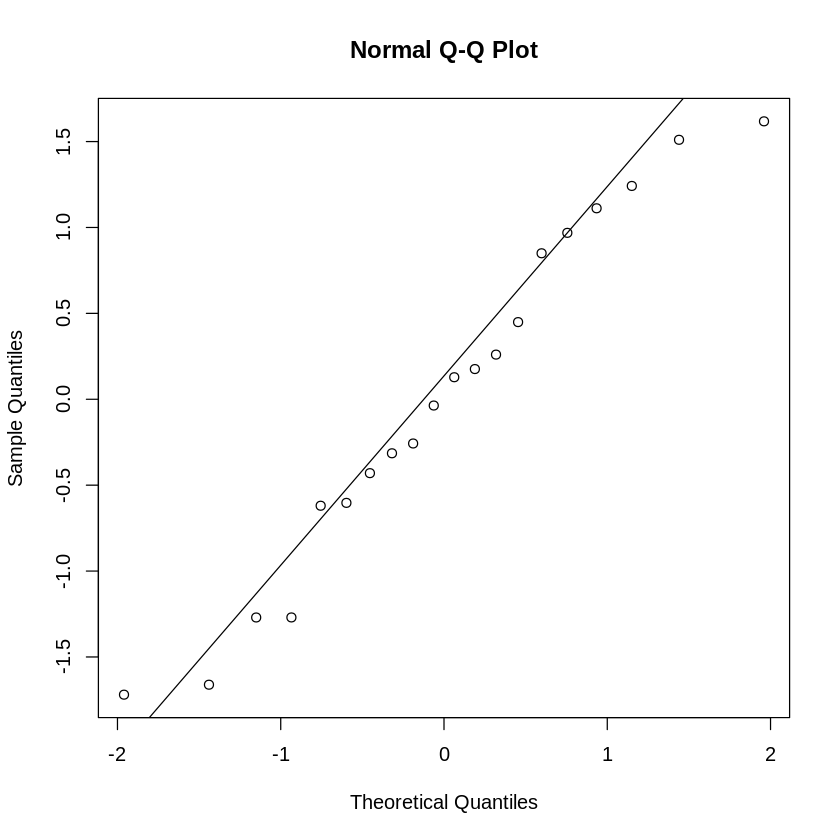

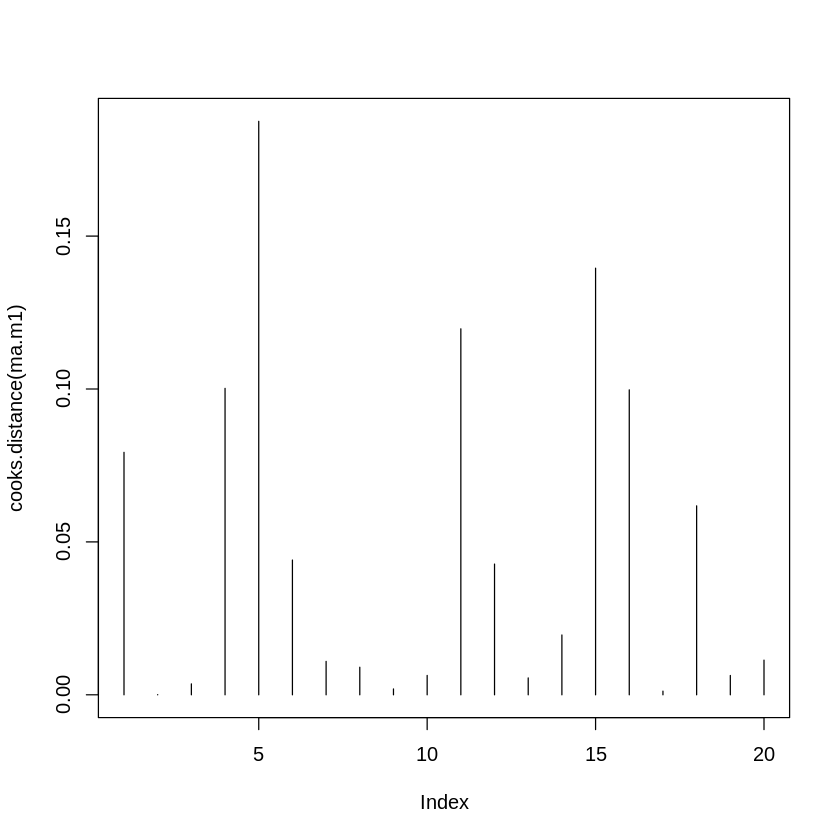

In [ ]:
# 4. Diagnostic Analysis
scatter.smooth(rstandard(ma.m1) ~ fitted(ma.m1))
qqnorm(rstandard(ma.m1)); qqline(rstandard(ma.m1))
plot(cooks.distance(ma.m1), type="h")

In [ ]:
# Identify the observation that is influential
influential = influence.measures(ma.m1)$is.inf
data.frame(colSums(influential))

outlier_index = which(influential[, "hat"])
outlier_index

,colSums.influential.
,<dbl>
dfb.1_,0
dfb.Rdct,0
dffit,0
cov.r,1
cook.d,0
hat,1


19 
19

In [ ]:
# 5
ma.m2 <- lm(pH0 ~ Reduction, data = manuka[-outlier_index, ])
summary(ma.m2); anova(ma.m2)


Call:
lm(formula = pH0 ~ Reduction, data = manuka[-outlier_index, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48802 -0.16935 -0.01125  0.26207  0.46449 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.772427   0.078482  99.034   <2e-16 ***
Reduction   -0.003498   0.001786  -1.959   0.0667 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3018 on 17 degrees of freedom
Multiple R-squared:  0.1842,	Adjusted R-squared:  0.1362 
F-statistic: 3.837 on 1 and 17 DF,  p-value: 0.06673


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Reduction,1,0.3494222,0.34942224,3.83738,0.06673361
Residuals,17,1.5479778,0.09105752,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Reduction,1,0.6353813,0.63538135,7.38151,0.01413492
Residuals,18,1.5493937,0.08607743,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Reduction,1,0.3494222,0.34942224,3.83738,0.06673361
Residuals,17,1.5479778,0.09105752,NA,NA


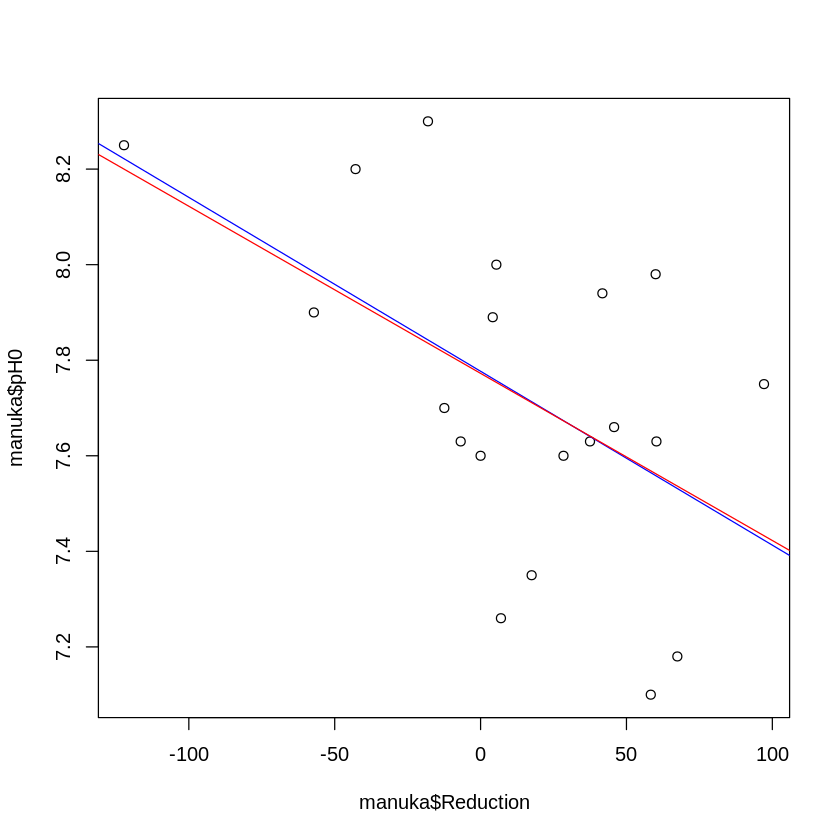

In [ ]:
# 6
anova(ma.m1); anova(ma.m2)

# scatter.smooth(rstandard(ma.m2) ~ fitted(ma.m2))
plot(manuka$pH0 ~ manuka$Reduction)
abline(ma.m1, col = "blue")
abline(ma.m2, col = "red")

### 15

A study of babies [4] hypothesized that babies would take longer to
learn to crawl in colder months because the extra clothing restricts their
movement (data set: crawl). The data and a fuller description are given in
Problem 2.16 (p. 87). In that problem, a linear regression model was fitted
to the data.
1. Perform a diagnostic analysis of the fitted linear regression model.
2. Identify any influential observations or outliers.
3. Suppose some of the babies were twins. Which assumption would be
violated by the inclusion of these babies in the study? Do you think this
would have practical implications?

In [ ]:
data(crawl); head(crawl)

,BirthMonth,Age,SD,SampleSize,Temp
,<fct>,<dbl>,<dbl>,<int>,<int>
1,January,29.84,7.08,32,66
2,February,30.52,6.96,36,73
3,March,29.70,8.33,23,72
4,April,31.84,6.21,26,63
5,May,28.58,8.07,27,52
6,June,31.44,8.10,29,39


In [ ]:
cr.m = lm(Age ~ Temp, weights = SampleSize, data = crawl)
summary(cr.m)


Call:
lm(formula = Age ~ Temp, data = crawl, weights = SampleSize)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-16.581  -4.325   2.001   4.026   9.146 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.70254    1.26003  28.335 6.97e-11 ***
Temp        -0.07561    0.02454  -3.081   0.0116 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.399 on 10 degrees of freedom
Multiple R-squared:  0.487,	Adjusted R-squared:  0.4357 
F-statistic: 9.494 on 1 and 10 DF,  p-value: 0.01162


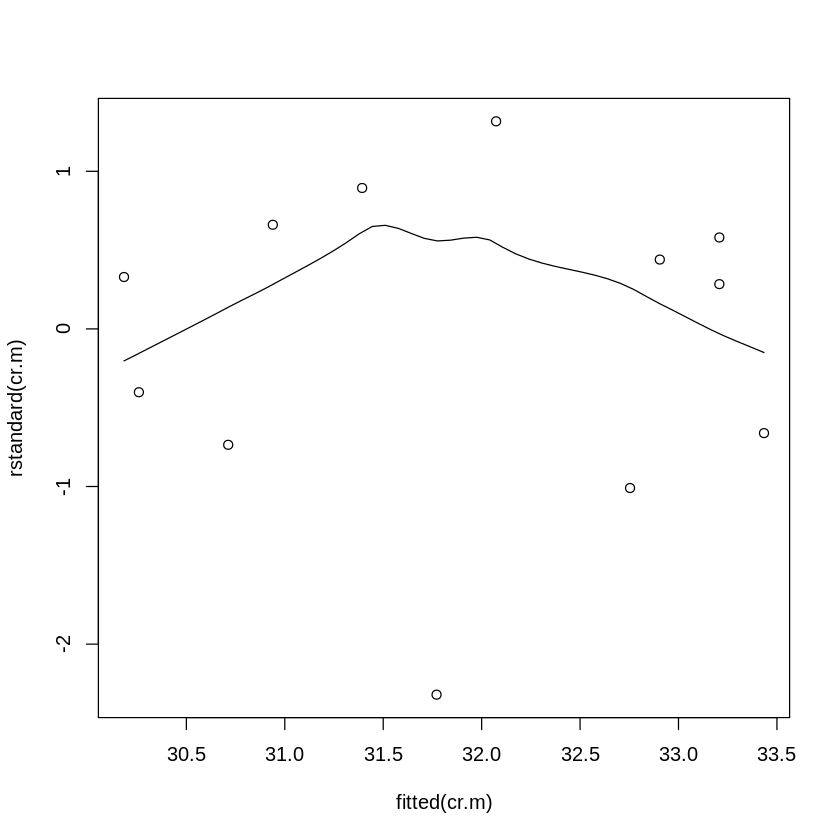

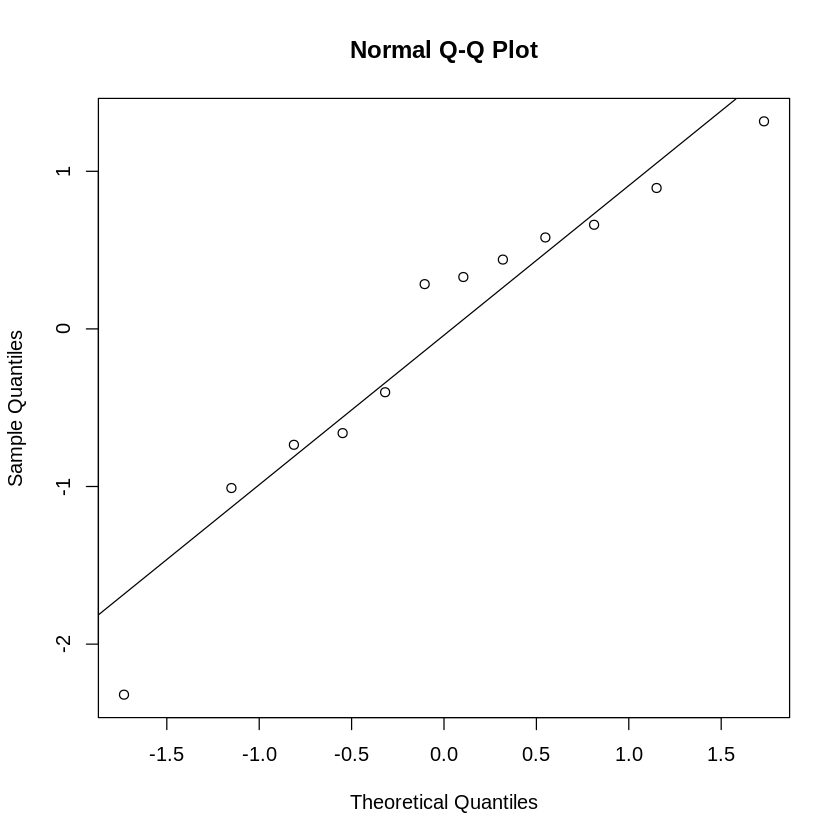

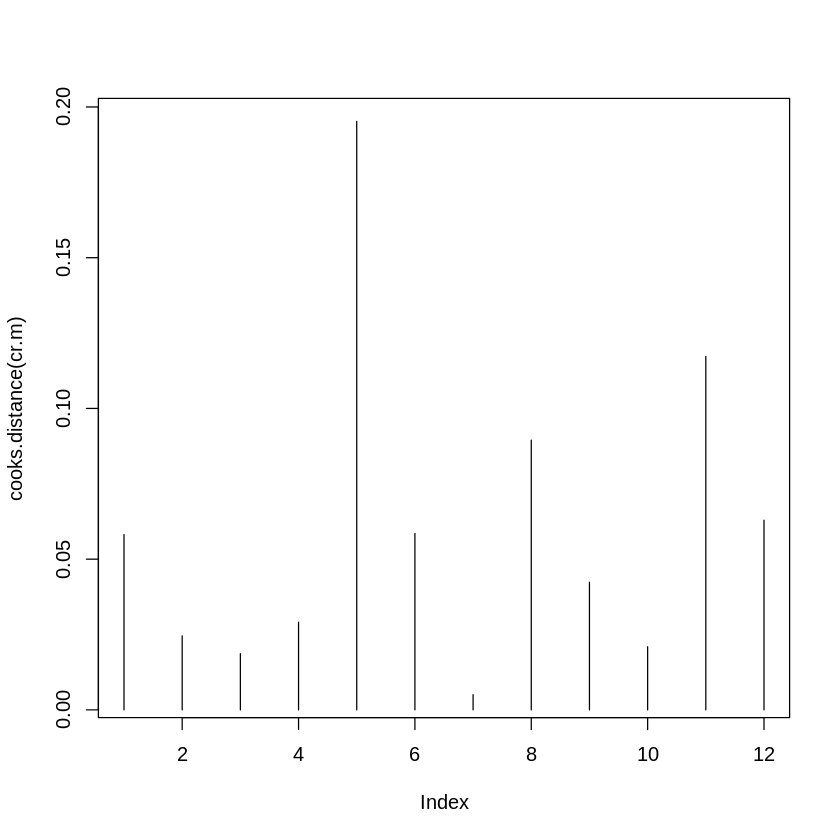

In [ ]:
# 1
scatter.smooth(rstandard(cr.m) ~ fitted(cr.m))
qqnorm(rstandard(cr.m)); qqline(rstandard(cr.m))
plot(cooks.distance(cr.m), type="h")

In [ ]:
# 2
influence = influence.measures(cr.m)$is.inf
data.frame(colSums(influence)); which(influence[, "cov.r"])

,colSums.influence.
,<dbl>
dfb.1_,0
dfb.Temp,0
dffit,0
cov.r,2
cook.d,0
hat,0


2 5 
2 5

In [ ]:
# 3. No problem

### 16

Children were asked to build towers out of cubical and cylindrical
blocks as high as they could [20, 33], and the number of blocks used and the
time taken were recorded. The data (data set: blocks) and a fuller description are given in Problem 2.18 (p. 88). In that problem, a linear regression
model was fitted to model the time to build the towers, based on the initial
examination in Problem 1.9 (p. 28).
1. Perform a diagnostic analysis of the linear regression model fitted in Problem 2.18 (p. 88), and show a transformation of the response is necessary.
2. Fit an appropriate linear regression model to the data after applying the
transformation, ensuring a diagnostic analysis.

In [ ]:
data(blocks); head(blocks)

,Child,Number,Time,Trial,Shape,Age
,<fct>,<int>,<dbl>,<int>,<fct>,<dbl>
1,A,11,30.0,1,Cube,4.67
2,B,9,19.0,1,Cube,5.00
3,C,8,18.6,1,Cube,4.42
4,D,9,23.0,1,Cube,4.33
5,E,10,29.0,1,Cube,4.33
6,F,13,178.0,1,Cube,4.83


In [ ]:
par(mfrow=c(2, 4))
m1 = lm(Time ~ Shape, data=blocks); anova(m1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Shape,1,5218.618,5218.6176,8.539566,0.004314623
Residuals,98,59888.816,611.1104,NA,NA


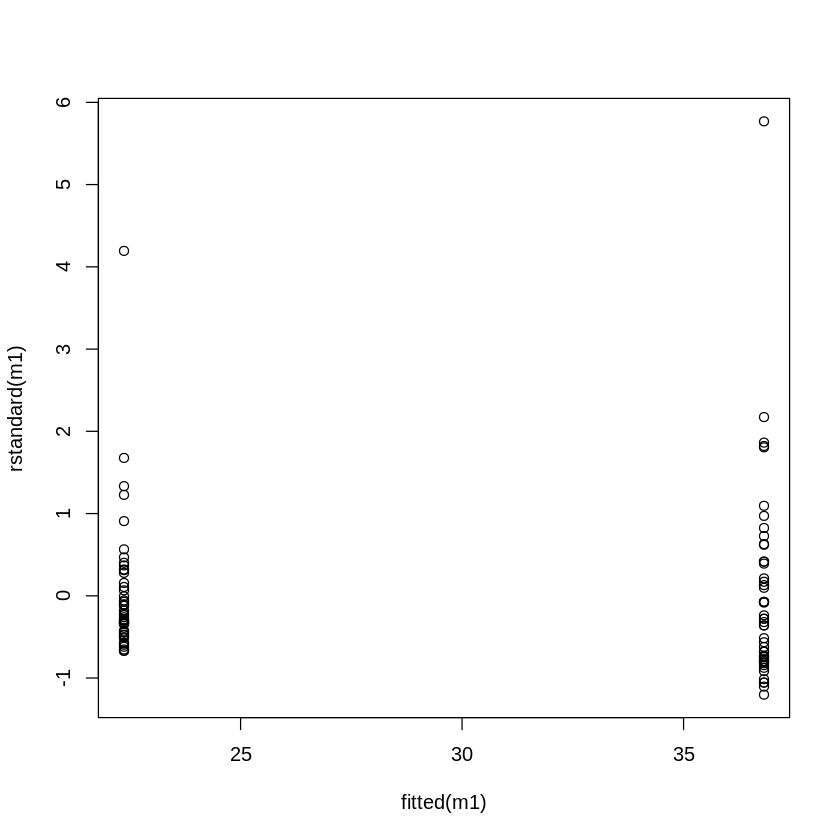

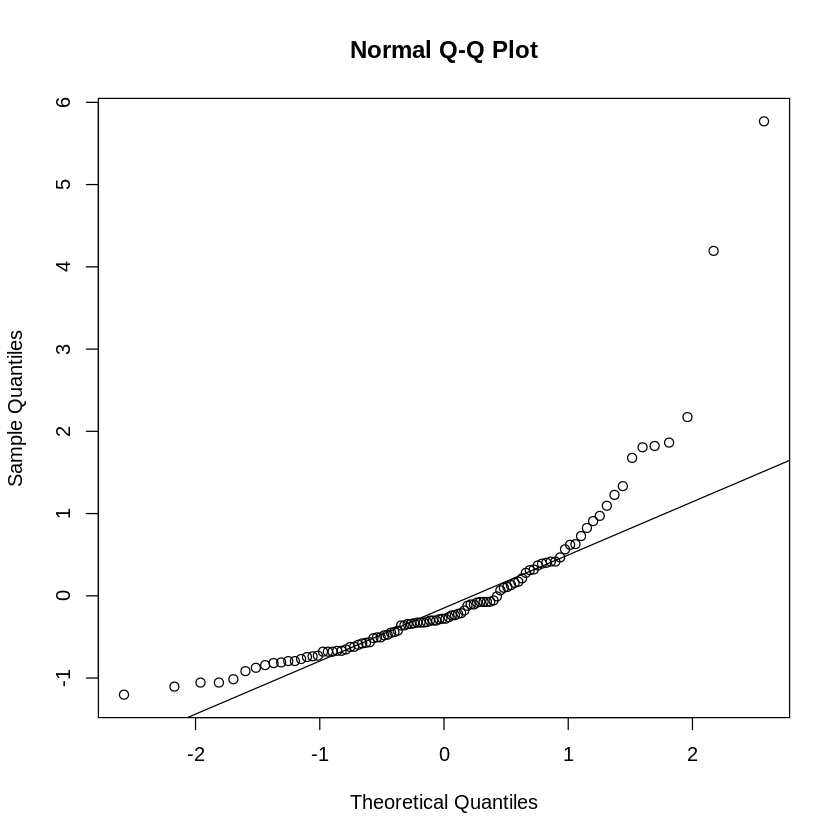

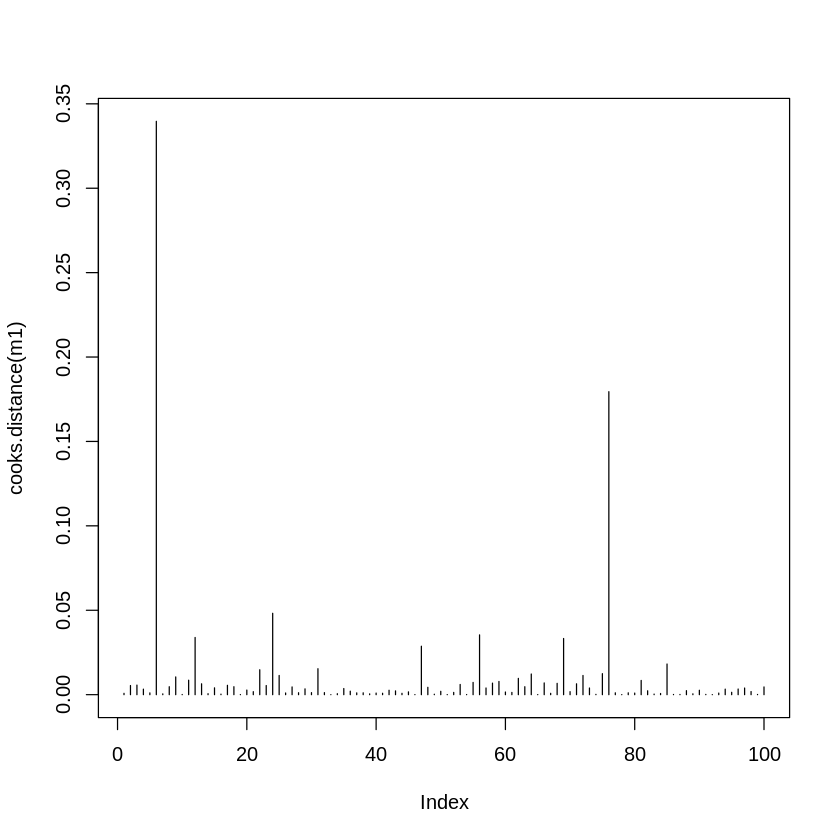

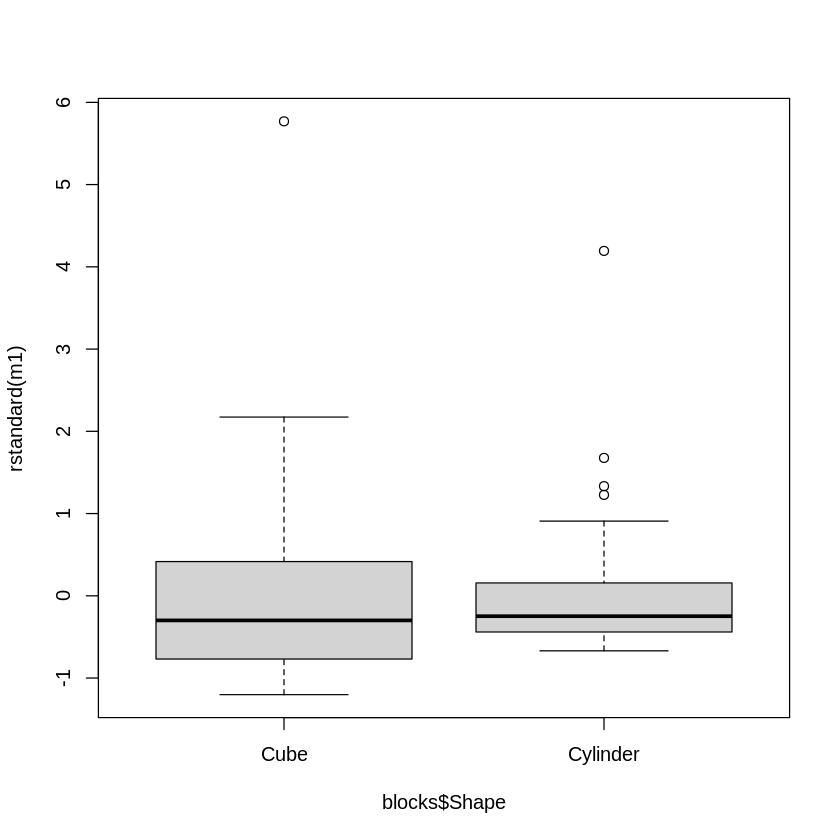

In [ ]:
# 1
plot(rstandard(m1) ~ fitted(m1) )
qqnorm(rstandard(m1)); qqline(rstandard(m1))
plot(cooks.distance(m1), type="h")
plot(rstandard(m1) ~ blocks$Shape)

In [ ]:
data.frame(colSums(influence.measures(m1)$is.inf))

,colSums.influence.measures.m1..is.inf.
,<dbl>
dfb.1_,1
dfb.ShpC,0
dffit,2
cov.r,2
cook.d,0
hat,0


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Shape,1,6.282826e+00,6.282826e+00,1.484219e+01,0.0002110496
Age,1,8.063286e-05,8.063286e-05,1.904824e-04,0.9890169583
Shape:Age,1,3.068779e-01,3.068779e-01,7.249506e-01,0.3966437061
Residuals,96,4.063763e+01,4.233086e-01,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Shape,1,6.282826e+00,6.282826e+00,1.488439e+01,0.0002058511
Age,1,8.063286e-05,8.063286e-05,1.910241e-04,0.9890010592
Residuals,97,4.094451e+01,4.221083e-01,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Shape,1,6.282826,6.2828263,15.03781,0.000190795
Residuals,98,40.944588,0.4178019,NA,NA


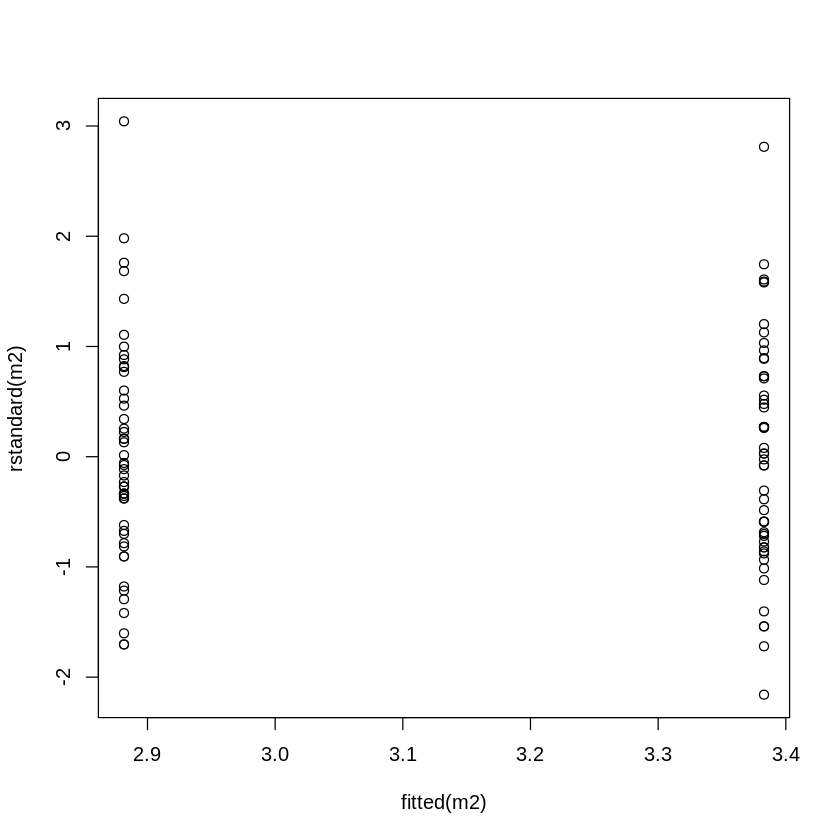

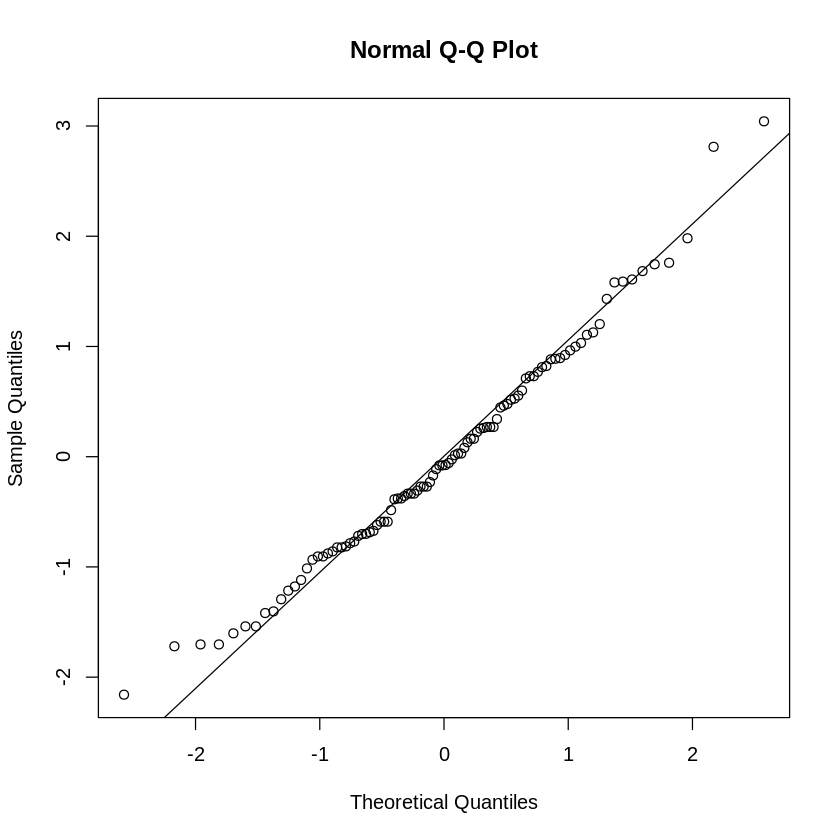

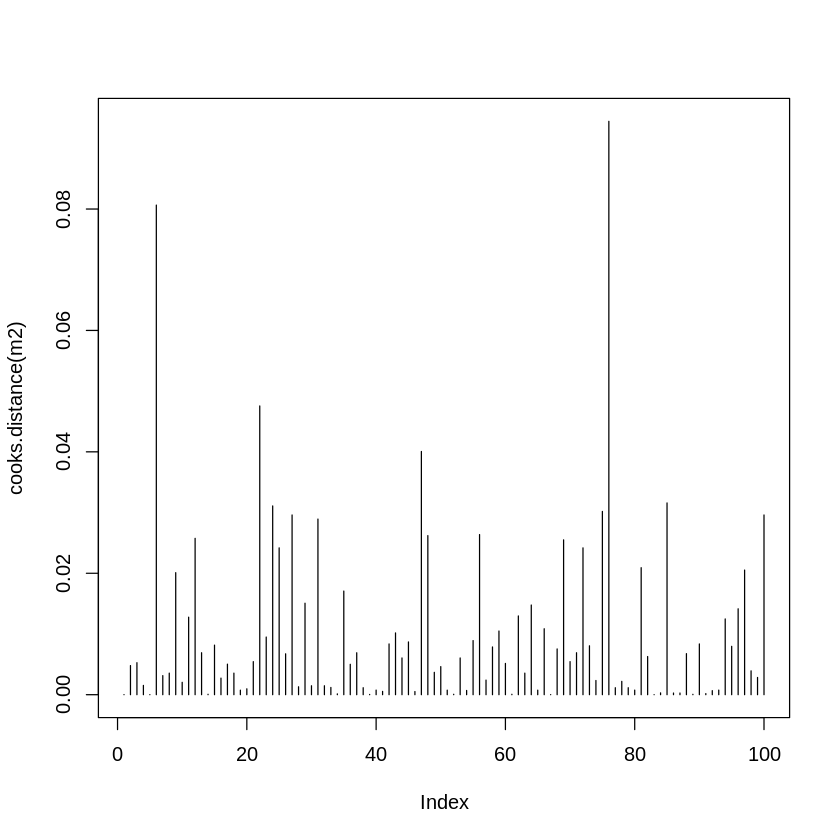

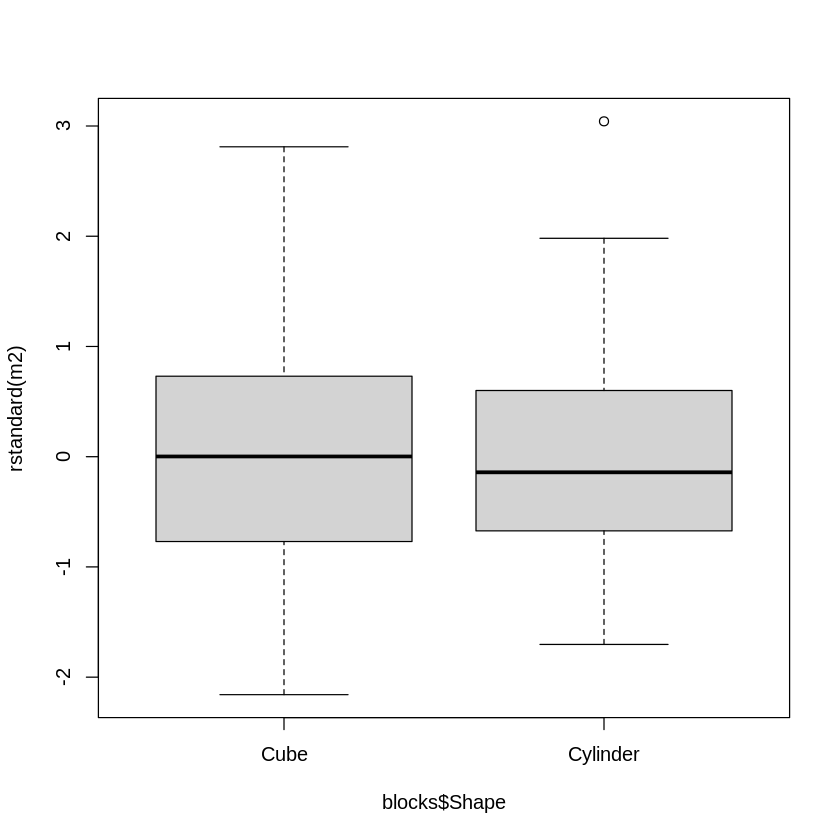

In [ ]:
# 2
m2 = lm(log(Time) ~ Shape * Age, data=blocks); anova(m2)
m2 = update(m2, . ~ Shape + Age); anova(m2)
m2 = update(m2, . ~ Shape); anova(m2)
plot(rstandard(m2) ~ fitted(m2) )
qqnorm(rstandard(m2) ); qqline( rstandard(m2) )
plot(cooks.distance(m2), type="h")
plot(rstandard(m2) ~ blocks$Shape)

In [ ]:
data.frame(colSums(influence.measures(m2)$is.inf))

,colSums.influence.measures.m2..is.inf.
,<dbl>
dfb.1_,0
dfb.ShpC,0
dffit,1
cov.r,2
cook.d,0
hat,0


### 17

In Problem 2.17, the daily energy requirements and weight of 64
wethers (Table 2.11; data set: sheep) were analysed [18, 38, 42].
1. Using the model fitted in Problem 2.17, perform a diagnostic analysis.
2. Fit another linear regression model using the logarithm of energy requirements as the response variable. Perform a diagnostic analysis of this
second model, and show this is a superior model.
3. Interpret the model that was fitted using the logarithm of energy requirements.

In [ ]:
data(sheep); head(sheep)

,Weight,Energy
,<dbl>,<dbl>
1,22.1,1.31
2,26.2,1.27
3,33.2,1.25
4,34.3,1.14
5,49.0,1.78
6,52.6,1.70



Call:
lm(formula = Energy ~ Weight, data = sheep)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76227 -0.22099  0.00156  0.21907  1.31339 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.132941   0.180436   0.737    0.464    
Weight      0.043416   0.004857   8.939 9.45e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3662 on 62 degrees of freedom
Multiple R-squared:  0.5631,	Adjusted R-squared:  0.5561 
F-statistic: 79.91 on 1 and 62 DF,  p-value: 9.447e-13


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Weight,1,10.718332,10.7183323,79.9102,9.447141e-13
Residuals,62,8.316043,0.1341297,NA,NA


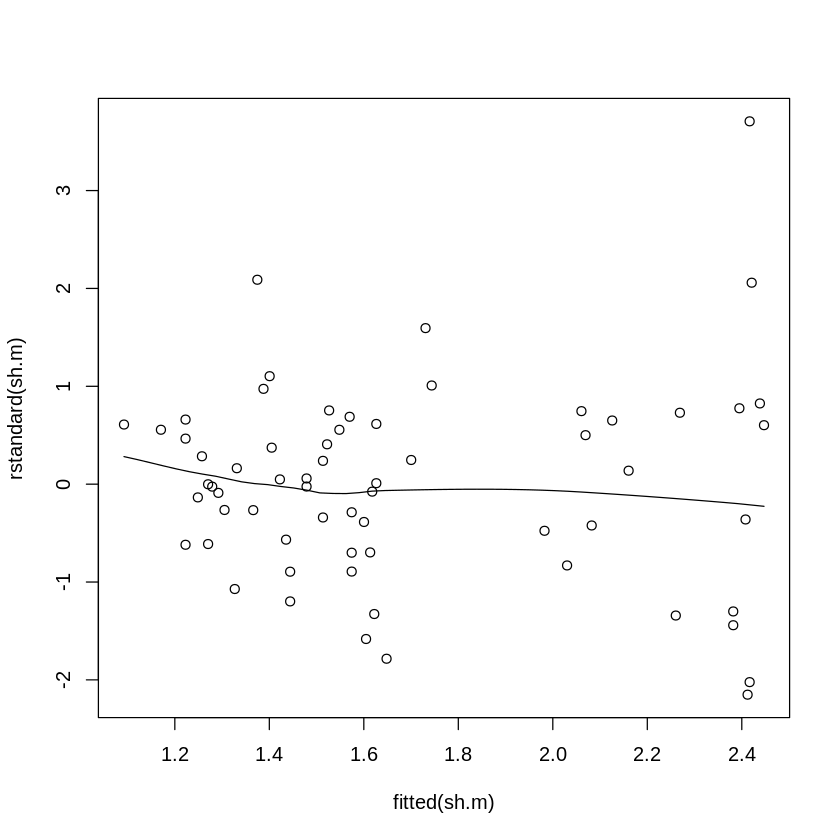

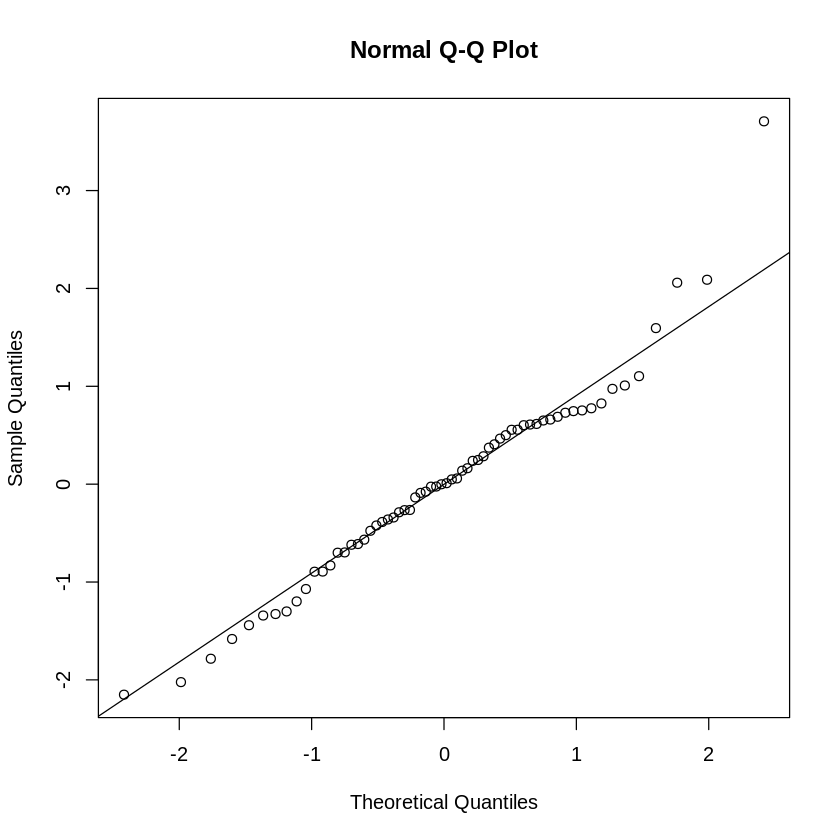

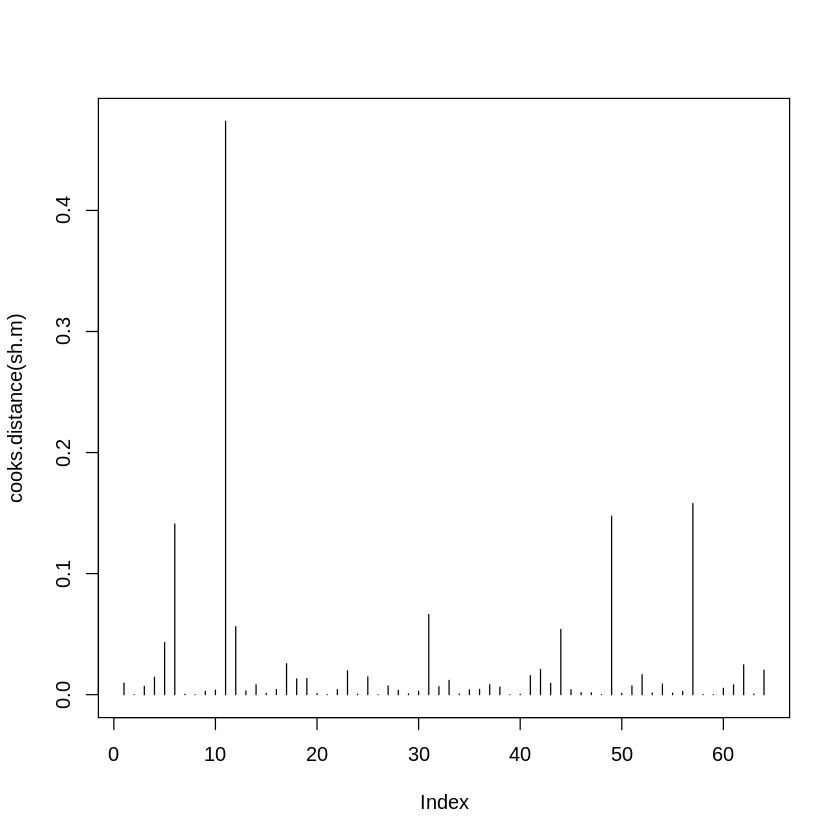

In [ ]:
# 1
sh.m = lm(Energy ~ Weight, data = sheep); summary(sh.m); anova(sh.m)
# plot(rstandard(sh.m) ~ fitted(sh.m))
scatter.smooth(rstandard(sh.m) ~ fitted(sh.m))
qqnorm(rstandard(sh.m)); qqline(rstandard(sh.m))
plot(cooks.distance(sh.m), type="h")


Call:
lm(formula = log(Energy) ~ Weight, data = sheep)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45609 -0.13072  0.02761  0.12537  0.44848 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.366236   0.098997  -3.699 0.000461 ***
Weight       0.023562   0.002665   8.842 1.39e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2009 on 62 degrees of freedom
Multiple R-squared:  0.5577,	Adjusted R-squared:  0.5506 
F-statistic: 78.19 on 1 and 62 DF,  p-value: 1.386e-12


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Weight,1,3.156956,3.15695636,78.18841,1.385532e-12
Residuals,62,2.503329,0.04037627,NA,NA


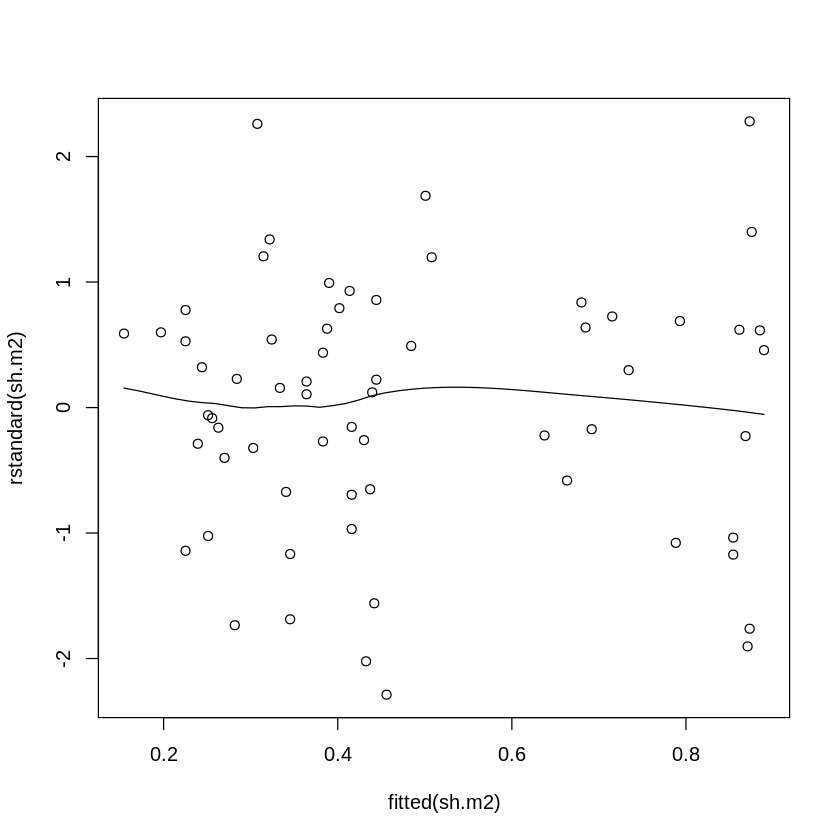

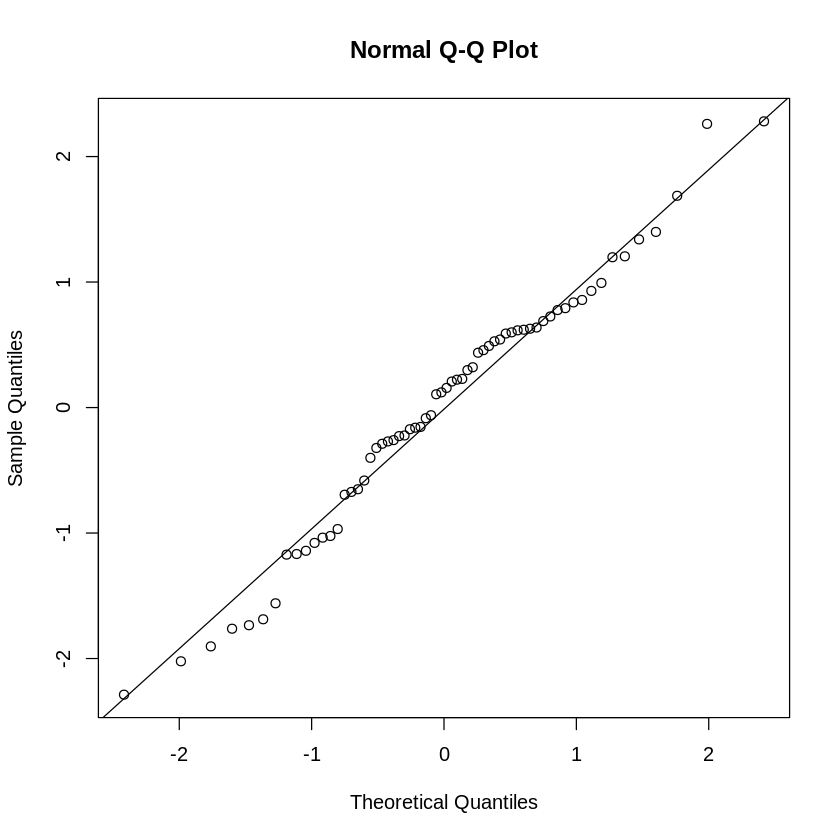

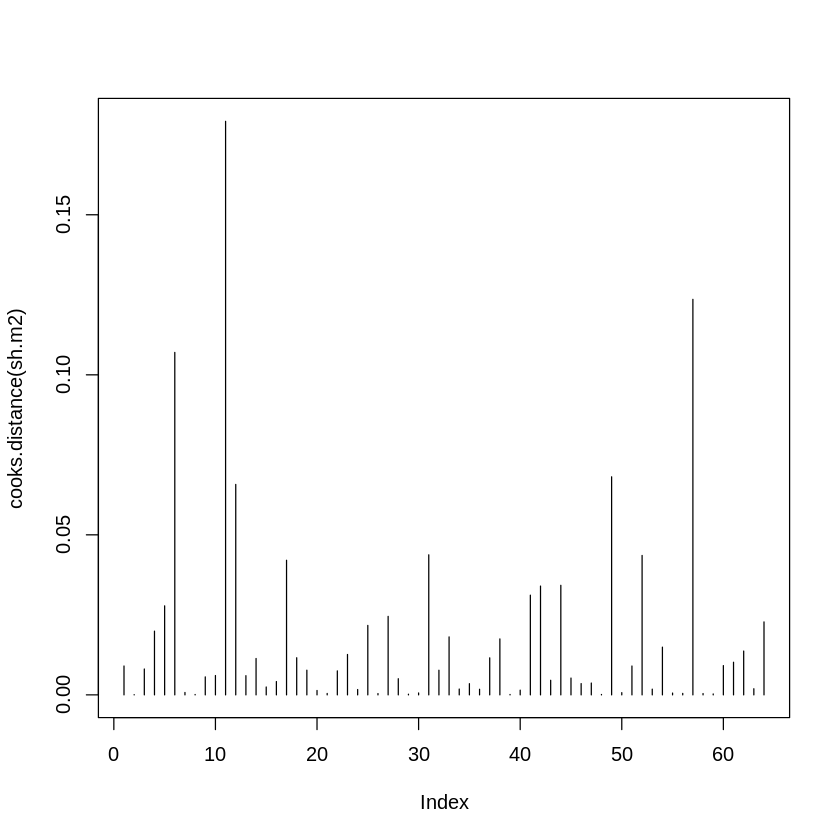

In [ ]:
# 2
# 1
sh.m2 = lm(log(Energy) ~ Weight, data = sheep); summary(sh.m2); anova(sh.m2)
# plot(rstandard(sh.m2) ~ fitted(sh.m2))
scatter.smooth(rstandard(sh.m2) ~ fitted(sh.m2))
qqnorm(rstandard(sh.m2)); qqline(rstandard(sh.m2))
plot(cooks.distance(sh.m2), type="h")

### 18

A study [23] measured the body fat percentage and bmi of adults aged
between 23 and 61 (Table 3.10; data set: humanfat).
1. Plot the data, distinguishing between males and females. Which assumptions, if any, appear to be violated?
2. Fit the linear regression model with systematic component Percent.Fat
~ Age * Gender to the data.
3. Write down the two systematic components corresponding to females and
males.
4. Interpret each coefficient in this model.
5. Use a t-test to determine if the interaction term is significant.
6. Use an F-test to determine if the interaction term is significant.
7. Show that the P-values for the t- and F-tests are the same for the interaction term, and explain why. Also show that the square of the t-statistic
is the F-statistic (within the limitations of computer arithmetic).
8. To the earlier plot, add the separate regression lines for males and females.
9. Compute and plot the 90% confidence intervals about the fitted values
for both males and females, and comment
10. Argue that only using the females in the study is sensible. Furthermore,
argue that only using females aged over 38 is sensible.
11. Using this subset of the data, find a model using age and bmi as explanatory variables.
12. Using this model, compute Cook’s distance, leverages, Studentized residuals and standardized residuals to evaluate the model. Identify any outliers and influential observations, and discuss the differences between the
Studentized and standardized residuals.

In [ ]:
data(humanfat);
head(humanfat); str(humanfat)

,Age,Percent.Fat,Gender,BMI
,<int>,<dbl>,<fct>,<dbl>
1,23,9.5,M,17.8
2,23,27.9,F,22.5
3,27,7.8,M,24.6
4,27,17.8,M,20.5
5,39,31.4,F,25.1
6,41,25.9,F,21.4


'data.frame':	18 obs. of  4 variables:
 $ Age        : int  23 23 27 27 39 41 45 49 50 53 ...
 $ Percent.Fat: num  9.5 27.9 7.8 17.8 31.4 25.9 27.4 25.2 31.1 34.7 ...
 $ Gender     : Factor w/ 2 levels "F","M": 2 1 2 2 1 1 2 1 1 1 ...
 $ BMI        : num  17.8 22.5 24.6 20.5 25.1 21.4 26 22.3 21.8 28.4 ...


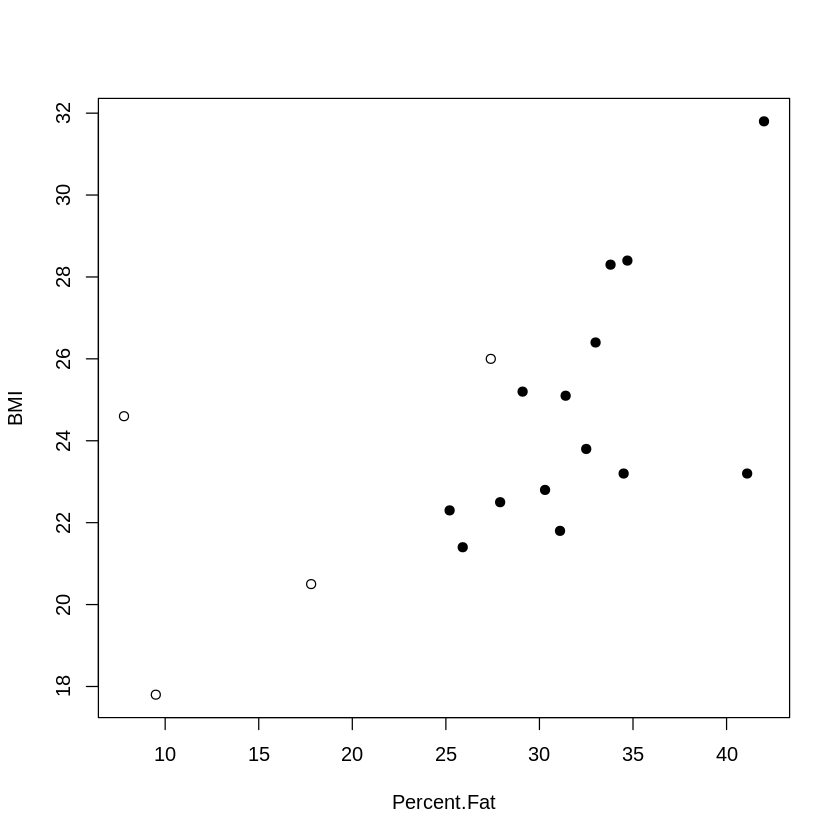

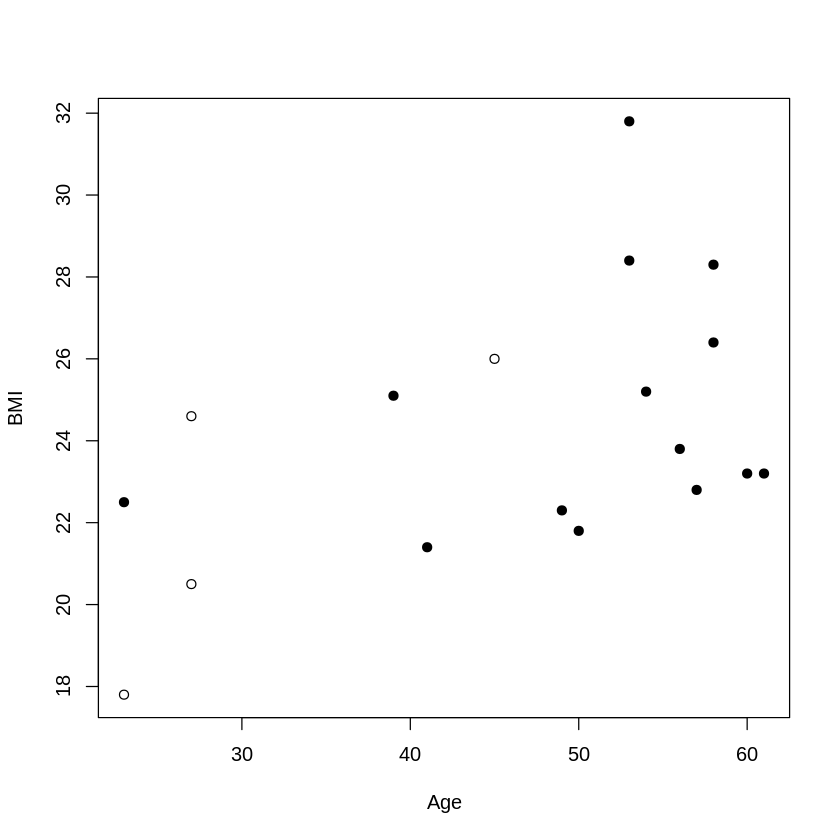

In [ ]:
# 1
plot(BMI ~ Percent.Fat, data = humanfat, pch=ifelse(Gender == "M", 1, 19))
plot(BMI ~ Age, data = humanfat, pch=ifelse(Gender == "M", 1, 19))

In [ ]:
# 2
hf.m = lm(Percent.Fat ~ Age * Gender, data = humanfat)
summary(hf.m)


Call:
lm(formula = Percent.Fat ~ Age * Gender, data = humanfat)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6756 -2.8862 -0.2464  1.9100  9.1641 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  20.1116     6.2395   3.223  0.00613 **
Age           0.2401     0.1204   1.994  0.06600 . 
GenderM     -29.2692    10.4098  -2.812  0.01386 * 
Age:GenderM   0.5725     0.2893   1.978  0.06790 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.488 on 14 degrees of freedom
Multiple R-squared:  0.8016,	Adjusted R-squared:  0.7591 
F-statistic: 18.86 on 3 and 14 DF,  p-value: 3.455e-05


In [ ]:
# 3
# Male (1): Percent.Fat = 20.1116 + 0.2401 * Age - 29.2692 + 0.5725 * Age
# Female (0): Percent.Fat = 20.1116 + 0.2401 * Age
# contrasts(humanfat$Gender)

In [ ]:
# 4 -
# 5 - Not significant

In [ ]:
# 6 - Significant
anova(hf.m)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Age,1,891.87365,891.87365,44.273608,1.089288e-05
Gender,1,168.78671,168.78671,8.378761,1.176673e-02
Age:Gender,1,78.85316,78.85316,3.914359,6.789632e-02
Residuals,14,282.02425,20.14459,NA,NA


### 19

 A study of urethral length L and mass M of various mammals [41]
expected to find isometric scaling; that is, proportional relationships being
maintained as the size of animals increases. For these data (Table 3.11; data
set: urinationL) then, one postulated relationship is $L = kM^\frac13$
for some proportionality constant k. By using a transformation, fit an appropriate weighted linear regression model, and test the hypothesis using both a t-test and an F-test. Interpret your model.

Take log
$$
    \log(L) = \log(kM^\frac13) = \log k + \frac13 \log M
$$

In [ ]:
data(urinationL); head(urinationL)

,Animal,Sex,Mass,Length,SampleSize
,<fct>,<fct>,<dbl>,<dbl>,<int>
1,Mouse,F,0.02,10.0,1
2,Wister Rat,F,0.20,9.5,20
3,Rat,F,0.20,17.0,1
4,Sprague-Dawley Rat,F,0.30,20.0,61
5,Dunkin Hartley Guinea Pig,M,0.40,20.0,1
6,Normal Adult Cat,F,2.30,49.4,1


In [ ]:
ur.m = lm(log(Length) ~ I(log(Mass)), weights = SampleSize, data = urinationL)
summary(ur.m)


Call:
lm(formula = log(Length) ~ I(log(Mass)), data = urinationL, weights = SampleSize)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-1.91075 -0.01707  0.14928  0.30587  1.06757 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.39500    0.04746   71.54   <2e-16 ***
I(log(Mass))  0.44516    0.01231   36.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5761 on 45 degrees of freedom
Multiple R-squared:  0.9667,	Adjusted R-squared:  0.966 
F-statistic:  1307 on 1 and 45 DF,  p-value: < 2.2e-16


### 20

A study of the annual rainfall between 1916 and 1990 in a wheatgrowing region of eastern Australia [6] explored the relationships between
mean annual rainfall AR and region Region, altitude Alt, latitude Lat and
longitude Lon (Table 3.12; data set: wheatrain).
1. Plot the annual rainfall against the region and altitude, and identify any
important features.
2. Interpret a regression model with systematic component AR ~ Alt *
Region.
3. Fit the model with systematic component AR ~ Alt * Region. Show
that the interaction term is not necessary in the model, but both main
effect terms are necessary.
4. Produce diagnostic plots and evaluate the fitted model. Use both standardized and Studentized residuals, and compare. Identify the observation that appears to be an outlier.
5. The data are spatial, so examine the independence of the data by plotting
the residuals against Lon and against Lat. Comment.
6. Summarize the diagnostic analysis of the fitted model.


In [ ]:
data(wheatrain); head(wheatrain)

,Station,Alt,Lat,Lon,AR,Region
,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,Goondiwindi,216,28.53,150.30,529,3
2,Condobolin,199,33.08,147.15,447,1
3,Coonamble,180,30.97,148.38,505,1
4,Gilgandra,278,31.72,148.67,563,2
5,Nyngan,177,31.56,147.20,440,1
6,Trangie,219,32.03,147.99,518,1


In [ ]:
# install.packages("ggplot2")
library(ggplot2)

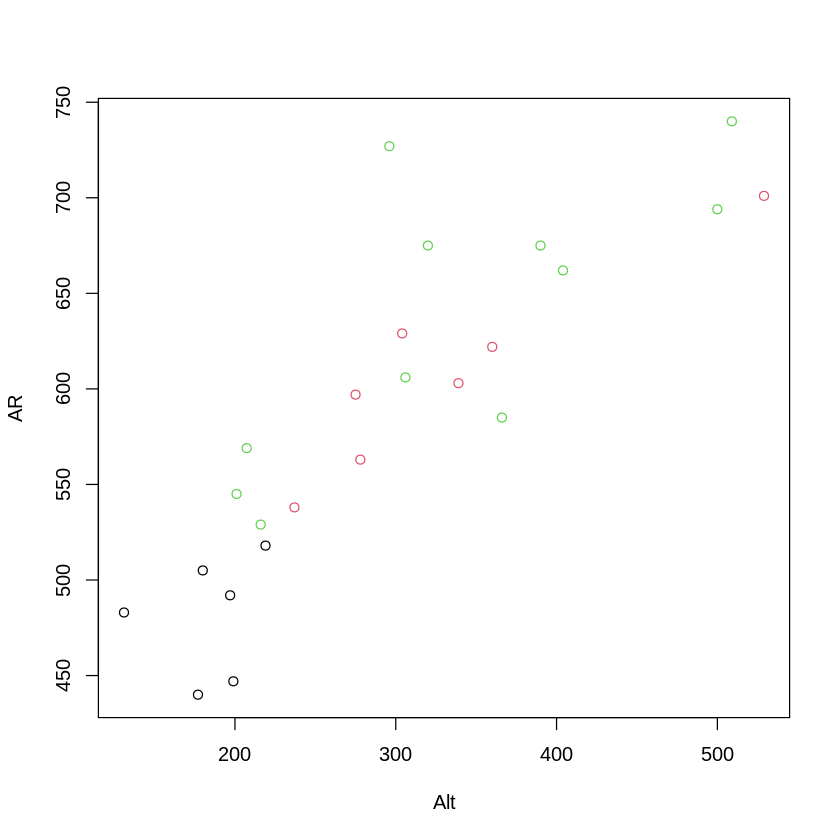

In [ ]:
# 1
plot(AR ~ Alt, col = Region, data = wheatrain)

In [ ]:
# 2
wh.m = lm(AR ~ Alt * Region, data = wheatrain)
summary(wh.m)


Call:
lm(formula = AR ~ Alt * Region, data = wheatrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.875 -18.706  -3.643  17.190 109.363 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 332.52429   68.82638   4.831 0.000101 ***
Alt           0.61302    0.29741   2.061 0.052530 .  
Region       45.36877   30.14543   1.505 0.147955    
Alt:Region   -0.03654    0.11702  -0.312 0.758089    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.38 on 20 degrees of freedom
Multiple R-squared:  0.8208,	Adjusted R-squared:  0.7939 
F-statistic: 30.54 on 3 and 20 DF,  p-value: 1.156e-07


In [ ]:
# 3. p-value = 0.75 - admit H0

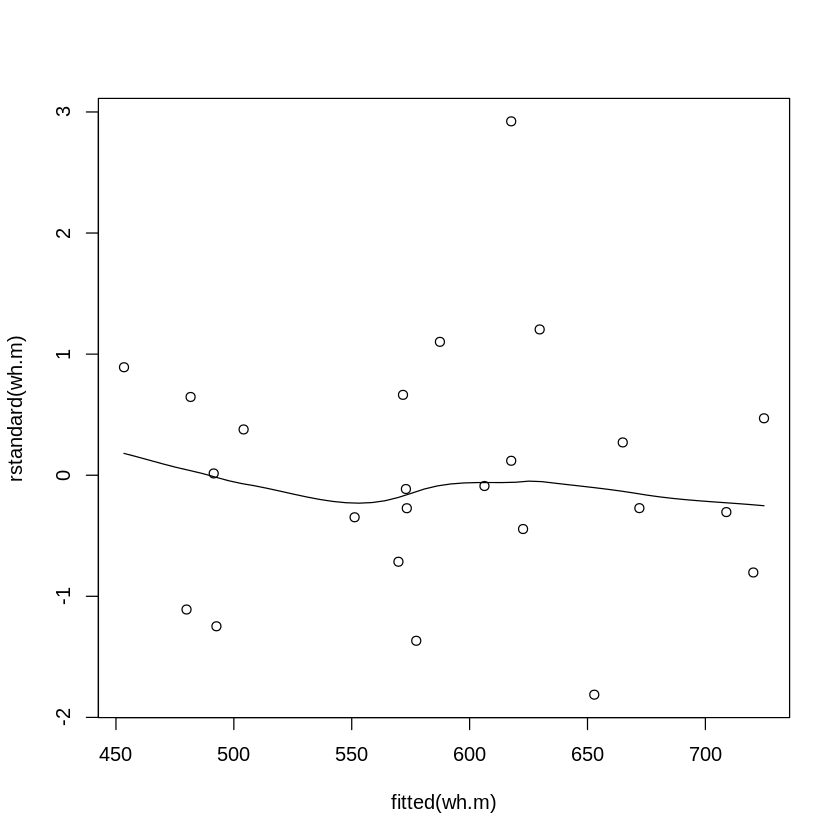

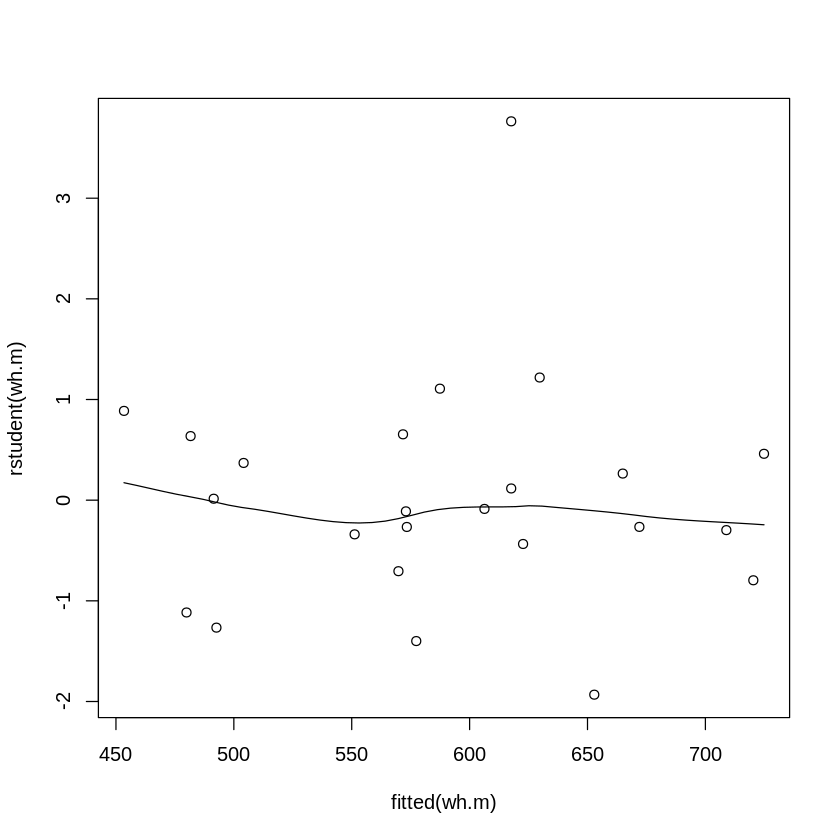

In [ ]:
scatter.smooth(rstandard(wh.m) ~ fitted(wh.m))
scatter.smooth(rstudent(wh.m) ~ fitted(wh.m))

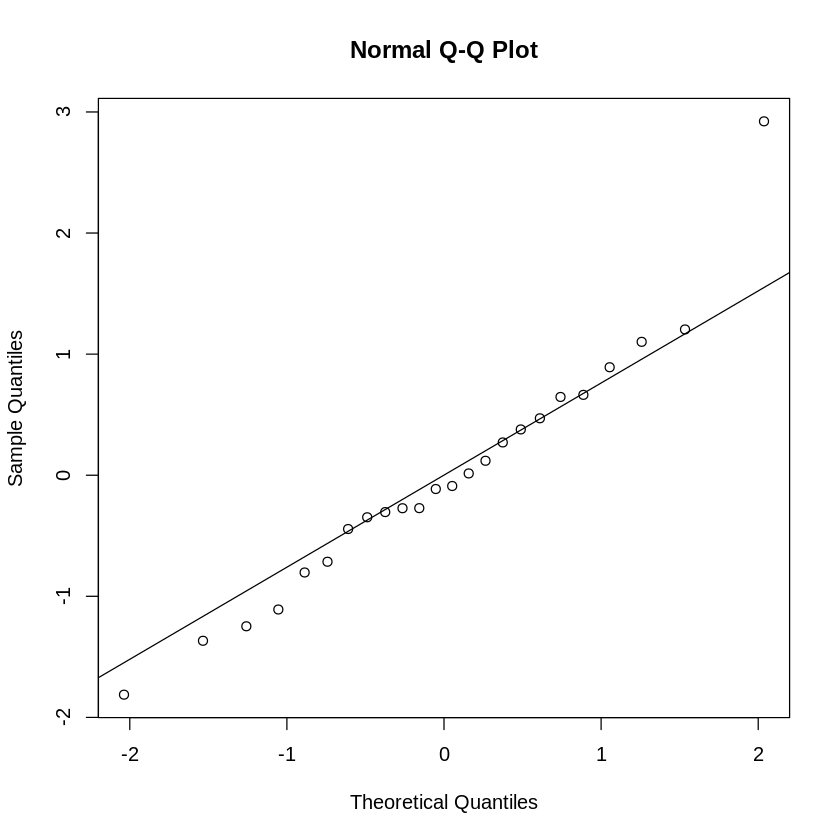

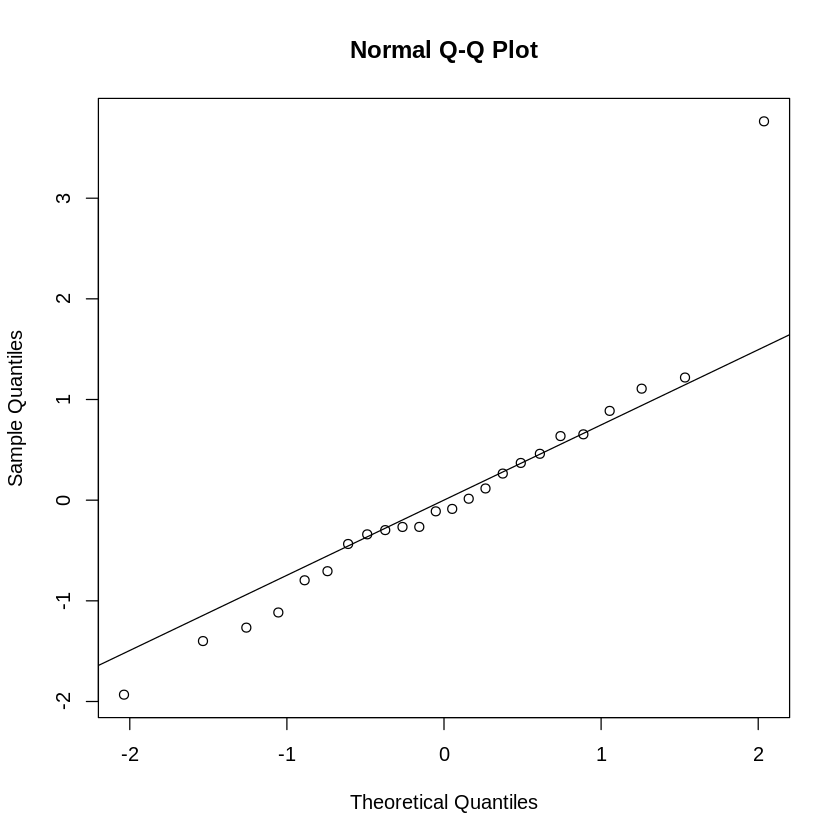

In [ ]:
qqnorm(rstandard(wh.m)); qqline(rstandard(wh.m))
qqnorm(rstudent(wh.m)); qqline(rstudent(wh.m))

,colSums.influence.
,<dbl>
dfb.1_,0
dfb.Alt,0
dfb.Regn,0
dfb.Al:R,0
dffit,0
cov.r,3
cook.d,0
hat,1


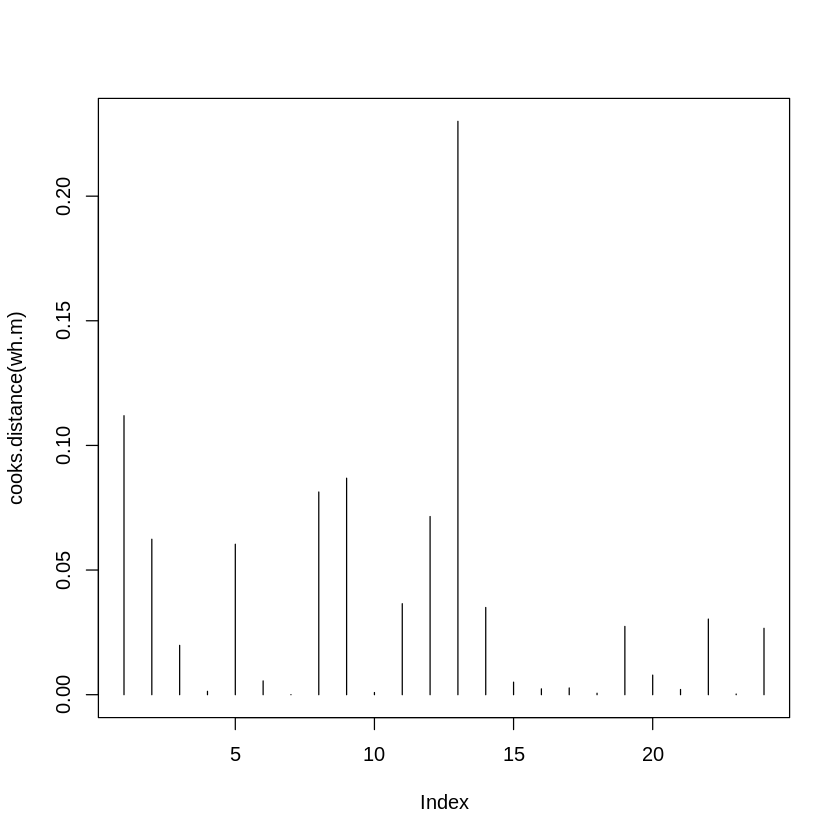

In [ ]:
plot(cooks.distance(wh.m), type = "h")

influence = influence.measures(wh.m)$is.inf
data.frame(colSums(influence))

In [ ]:
which(influence)

[1] 133 139 142 190

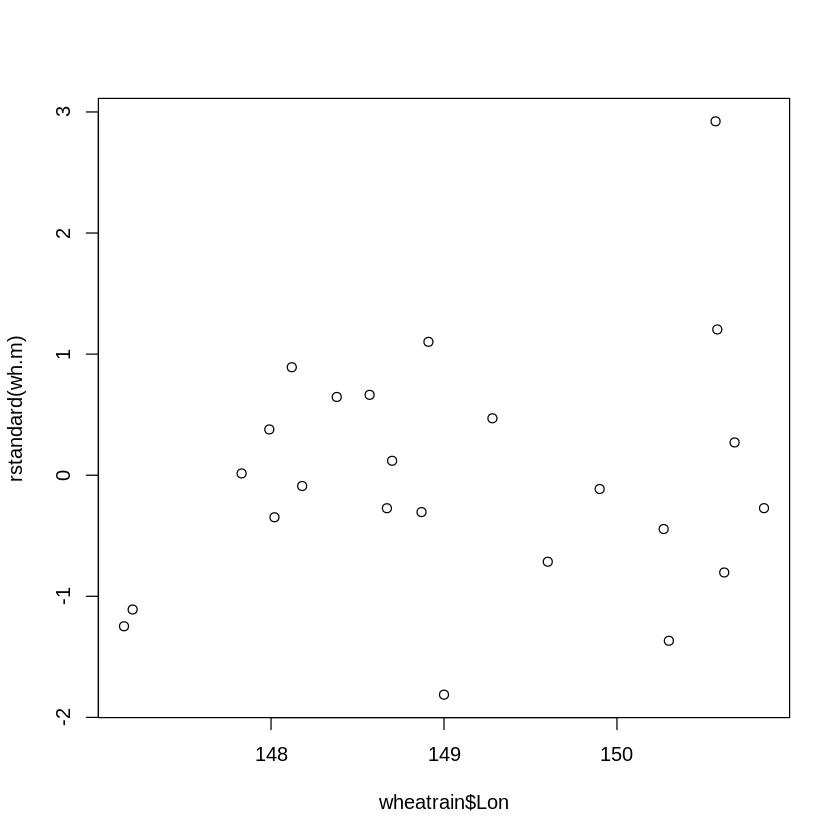

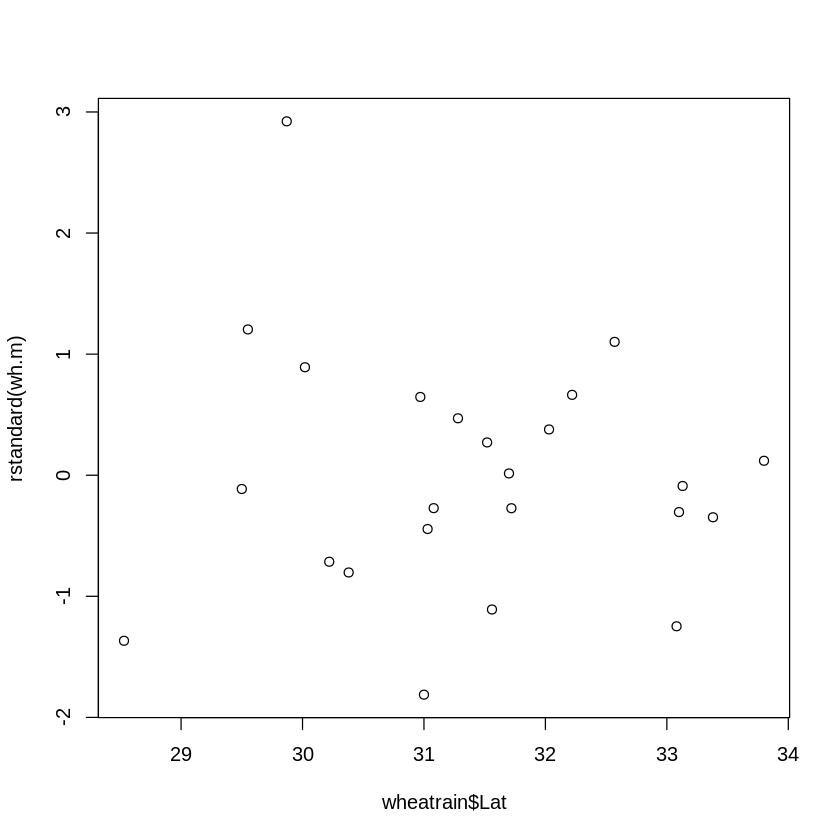

In [ ]:
# 5
plot(rstandard(wh.m) ~ wheatrain$Lon)
plot(rstandard(wh.m) ~ wheatrain$Lat)

In [ ]:
# 6 - Self

### 21

The tensile strength of Kraft paper (a strong, coarse and usually brown-
ish type of paper) was measured [18, 19] for diﬀerent percentages of hardwood
concentrations (Table 3.13; data set: paper).
1. Plot the data, and show that the data have a non-linear relationship.
2. Determine a suitable polynomial model for the data using poly().
3. Determine a suitable model using a regression spline.
4. Plot the two models (one using poly(); one using a regression spline) on
the data, and comment.

In [ ]:
data(paper); head(paper)

,Strength,Hardwood
,<dbl>,<dbl>
1,6.3,1.0
2,11.1,1.5
3,20.0,2.0
4,24.0,3.0
5,26.1,4.0
6,30.0,4.5


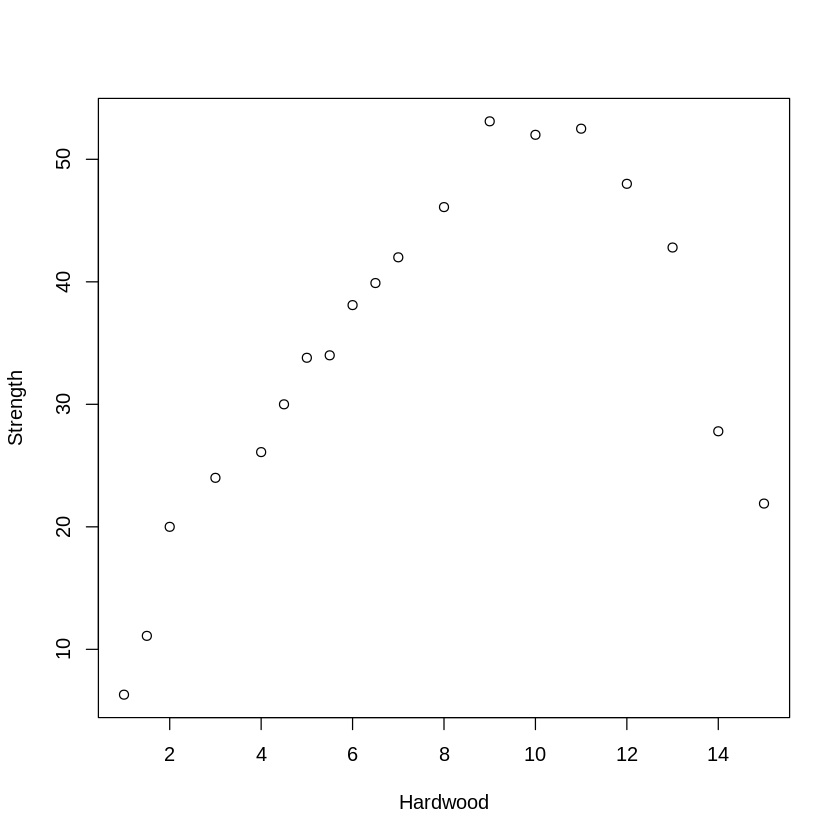

In [ ]:
# 1
plot(Strength ~ Hardwood, data = paper)

In [ ]:
library(splines)

In [ ]:
# 2
m1 = lm(Strength ~ poly(Hardwood, 5), data=paper); summary(m1)


Call:
lm(formula = Strength ~ poly(Hardwood, 5), data = paper)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.65167 -0.91159 -0.03811  0.96396  2.56865 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         34.1842     0.3906  87.512  < 2e-16 ***
poly(Hardwood, 5)1  32.3021     1.7027  18.971 7.39e-11 ***
poly(Hardwood, 5)2 -45.3963     1.7027 -26.662 9.84e-13 ***
poly(Hardwood, 5)3 -14.5740     1.7027  -8.559 1.06e-06 ***
poly(Hardwood, 5)4  -3.1647     1.7027  -1.859 0.085859 .  
poly(Hardwood, 5)5   7.2479     1.7027   4.257 0.000935 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.703 on 13 degrees of freedom
Multiple R-squared:  0.989,	Adjusted R-squared:  0.9847 
F-statistic: 233.1 on 5 and 13 DF,  p-value: 3.022e-12


In [ ]:
# 3
m2 = lm(Strength ~ ns(Hardwood, df=7), data=paper); summary(m2)


Call:
lm(formula = Strength ~ ns(Hardwood, df = 7), data = paper)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2810 -0.9210 -0.0456  1.0239  2.2482 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)              6.346      1.627   3.899  0.00248 ** 
ns(Hardwood, df = 7)1   20.103      2.611   7.698 9.40e-06 ***
ns(Hardwood, df = 7)2   32.095      2.810  11.420 1.93e-07 ***
ns(Hardwood, df = 7)3   37.686      3.161  11.924 1.24e-07 ***
ns(Hardwood, df = 7)4   51.394      3.295  15.598 7.55e-09 ***
ns(Hardwood, df = 7)5   35.932      2.631  13.656 3.05e-08 ***
ns(Hardwood, df = 7)6   40.849      4.672   8.743 2.78e-06 ***
ns(Hardwood, df = 7)7    2.546      2.171   1.173  0.26573    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.888 on 11 degrees of freedom
Multiple R-squared:  0.9885,	Adjusted R-squared:  0.9812 
F-statistic: 135.4 on 7 and 11 DF,  p-value: 8.751e-10


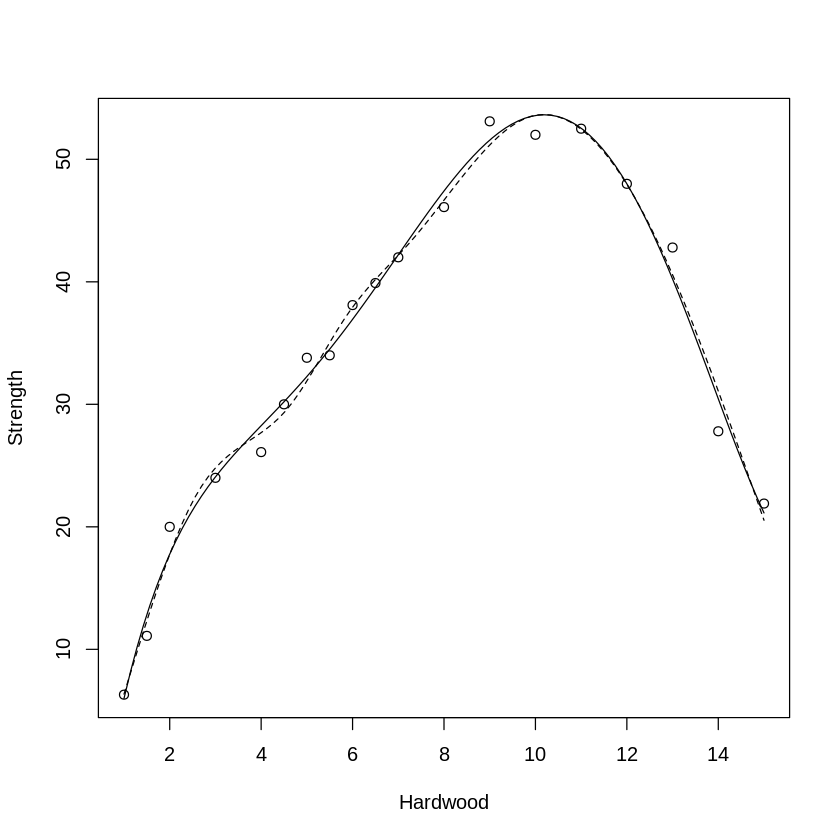

In [ ]:
# 4
newH = seq(min(paper$Hardwood), max(paper$Hardwood), length=100)
newy1 = predict(m1, newdata=data.frame(Hardwood=newH))
newy2 = predict(m2, newdata=data.frame(Hardwood=newH))

plot(Strength ~ Hardwood, data = paper)
lines(newy1 ~ newH)
lines(newy2 ~ newH, lty=2)

### 22

An experiment was conducted [11] to measure the heat developed by
setting cement with varying constituents (Table 3.14; data set: setting).
1. Plot each explanatory variable against heat evolved, and decide which
constituents appear to be related to heat evolved.
2. Fit the linear regression model predicting heat evolved from the explana-
tory variables A, B, C and D (that is, no interactions). Using t-tests, deter-
mine which explanatory variables appear statistically signiﬁcant. Com-
pare to your decisions in the previous part of this question.
3. Show that collinearity may be a problem. Explain why this may be the
case, and propose a solution.
4. Fit the amended model, and compare the t-test results to the t-test results
from the initial model above.

In [ ]:
data(setting); head(setting)

,A,B,C,D,Heat
,<int>,<int>,<int>,<int>,<dbl>
1,7,26,6,60,78.5
2,1,29,15,52,74.3
3,11,56,8,20,104.3
4,11,31,8,47,87.6
5,7,52,6,33,95.9
6,11,55,9,22,109.2


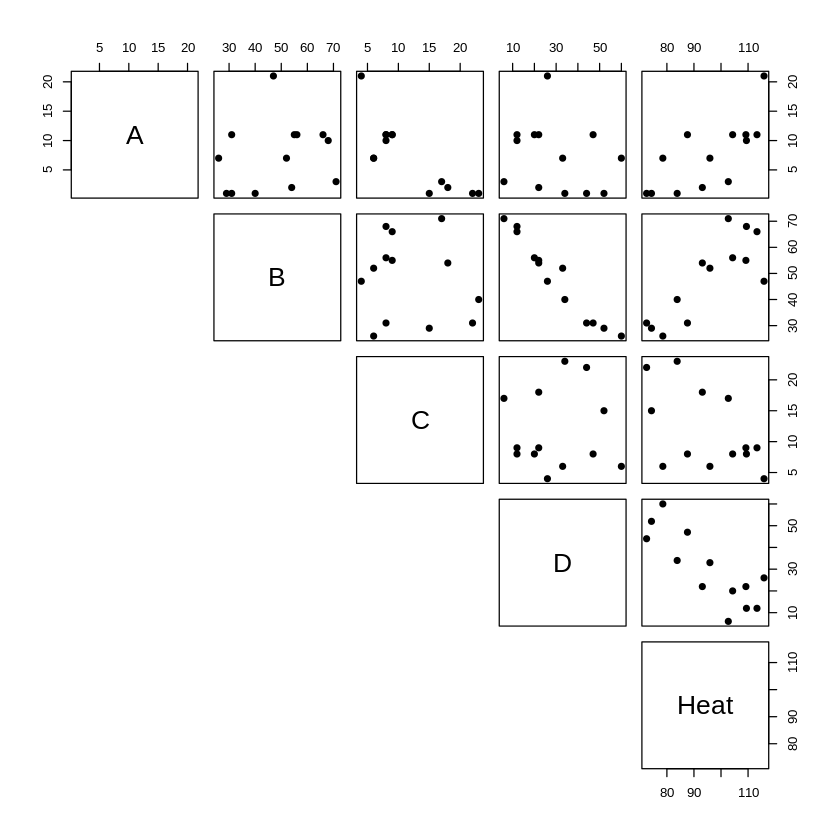

In [ ]:
# 1
pairs(setting, pch = 19, lower.panel = NULL)

In [ ]:
# 2
set.m = lm(Heat ~ ., data = setting)
summary(set.m); anova(set.m)


Call:
lm(formula = Heat ~ ., data = setting)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1750 -1.6709  0.2508  1.3783  3.9254 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  62.4054    70.0710   0.891   0.3991  
A             1.5511     0.7448   2.083   0.0708 .
B             0.5102     0.7238   0.705   0.5009  
C             0.1019     0.7547   0.135   0.8959  
D            -0.1441     0.7091  -0.203   0.8441  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.446 on 8 degrees of freedom
Multiple R-squared:  0.9824,	Adjusted R-squared:  0.9736 
F-statistic: 111.5 on 4 and 8 DF,  p-value: 4.756e-07


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
A,1,1450.0763281,1450.0763281,242.36791816,2.887559e-07
B,1,1207.7822656,1207.7822656,201.87052753,5.863323e-07
C,1,9.7938691,9.7938691,1.63696188,2.366003e-01
D,1,0.2469747,0.2469747,0.04127972,8.440715e-01
Residuals,8,47.8636394,5.9829549,NA,NA


In [ ]:
# 3 - B - D, A - C
cor(setting)

,A,B,C,D,Heat
A,1.0000000,0.2285795,-0.8241338,-0.2454451,0.7307175
B,0.2285795,1.0000000,-0.1392424,-0.9729550,0.8162526
C,-0.8241338,-0.1392424,1.0000000,0.0295370,-0.5346707
D,-0.2454451,-0.9729550,0.0295370,1.0000000,-0.8213050
Heat,0.7307175,0.8162526,-0.5346707,-0.8213050,1.0000000


In [ ]:
# 4
set.m1 = lm(Heat ~ A + B, data = setting)
summary(set.m1); anova(set.m1)


Call:
lm(formula = Heat ~ A + B, data = setting)

Residuals:
   Min     1Q Median     3Q    Max 
-2.893 -1.574 -1.302  1.363  4.048 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 52.57735    2.28617   23.00 5.46e-10 ***
A            1.46831    0.12130   12.11 2.69e-07 ***
B            0.66225    0.04585   14.44 5.03e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.406 on 10 degrees of freedom
Multiple R-squared:  0.9787,	Adjusted R-squared:  0.9744 
F-statistic: 229.5 on 2 and 10 DF,  p-value: 4.407e-09


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
A,1,1450.07633,1450.076328,250.4256,2.088092e-08
B,1,1207.78227,1207.782266,208.5818,5.028960e-08
Residuals,10,57.90448,5.790448,NA,NA


### 23

A compilation of data [1] from various studies of Gopher tortoises linked
the mean clutch size to environmental variables for 19 populations of the
tortoises (Table 3.15; data set: gopher).
1. Plot the mean clutch size against the temperature and evapotranspira-
tion. Comment on the relationships.
2. Explain why a weighted linear regression model is appropriate.
3. Fit a weighted linear regression model for modelling ClutchSize using
Evap and Temp as explanatory variables. Produce the t-tests, and com-
ment.
4. Compute the anova table for the ﬁtted model, and comment.
5. Show that collinearity is evident in the data.
6. Perform a diagnostic analysis of this model. Be sure to test spatial inde-
pendence by plotting the residuals against Latitude.

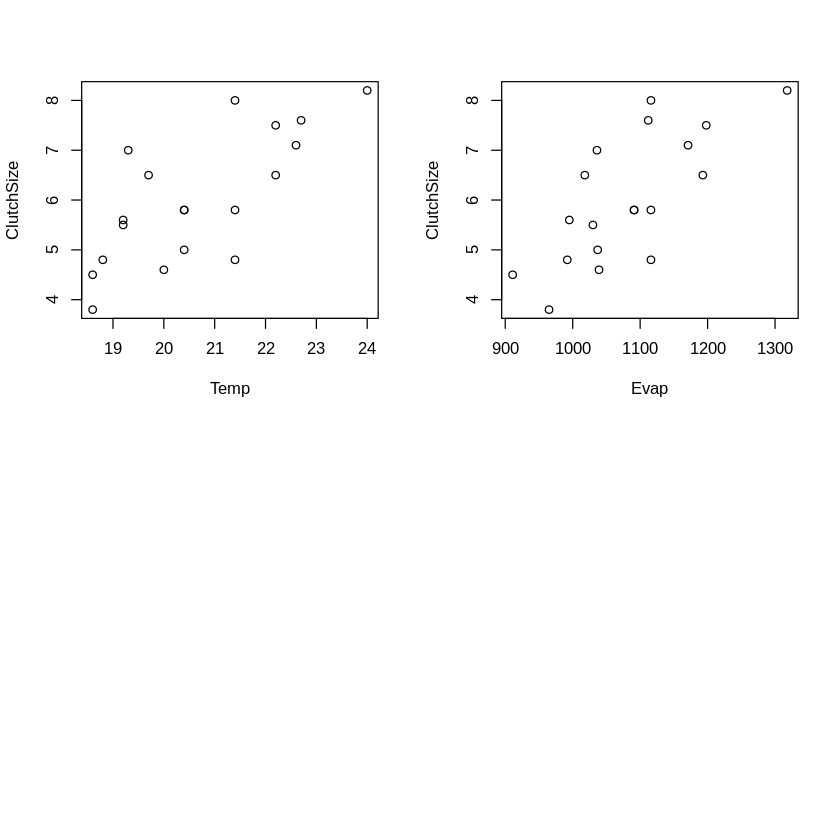

In [ ]:
data(gopher)

### Part 1
par(mfrow=c(2, 2))
plot(ClutchSize ~ Temp, data=gopher)
plot(ClutchSize ~ Evap, data=gopher)

In [ ]:
### Part 3
gt.lm = lm(ClutchSize ~ Temp + Evap, weights=SampleSize, data=gopher)
summary(gt.lm)


Call:
lm(formula = ClutchSize ~ Temp + Evap, data = gopher, weights = SampleSize)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-6.1069 -2.8587 -0.9348  1.7737 10.5469 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -6.028664   2.603663  -2.315   0.0342 *
Temp         0.351089   0.350390   1.002   0.3313  
Evap         0.004550   0.006081   0.748   0.4651  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.473 on 16 degrees of freedom
Multiple R-squared:  0.5819,	Adjusted R-squared:  0.5297 
F-statistic: 11.13 on 2 and 16 DF,  p-value: 0.0009335


In [ ]:
### Part 4
anova(gt.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Temp,1,434.27316,434.27316,21.7096383,0.0002617852
Evap,1,11.20181,11.20181,0.5599867,0.4651241815
Residuals,16,320.05925,20.00370,NA,NA


In [ ]:
### Part 5
cor(cbind(gopher$ClutchSize, gopher$Temp, gopher$Evap, gopher$Latitude))

1.0000000,0.7333730,0.7304700,-0.6891717
0.7333730,1.0000000,0.9414445,-0.9538697
0.7304700,0.9414445,1.0000000,-0.9275687
-0.6891717,-0.9538697,-0.9275687,1.0000000


1. Some reasonable positive relationships.
2. Each site has a different number of clutches.
3. No significant explanatory variables.
4. No significant explanatory variables.
6. Evaporation and temperature look related to latitude.

### 24

Consider the (artiﬁcial) data in Table 3.16 (based on [14]), and con-
tained in data set triangle.

1. Fit the linear regression model with the systematic component y ~ x1 +
x2 to the data. Show that the interaction term is not necessary.
2. Use appropriate diagnostics to show the model is appropriate.
3. Interpret the ﬁtted model.
4. The data are actually randomly generated so that $\mu = \sqrt{x_1^2 + x_2^2}$ ; that is, $x_1$ and $x_2$ are the lengths of the sides of a right-angled triangle, and $\mu$ is the length of the hypotenuse (and some randomness has been added to produce y). What lesson does this demonstrate?
5. Fit the model for modelling $\mu = E[y^2]$, using the systematic component
`I(x1^2) + I(x2^2) - 1`. Then use the t-test to conﬁrm that the parameter estimates suggested by Pythagoras’ theorem are supported by
the data.

In [2]:
data(triangle); head(triangle)

,y,x1,x2
,<dbl>,<dbl>,<dbl>
1,10.1,5.3,8.5
2,11.6,5.4,10.3
3,10.4,4.5,9.4
4,13.0,4.7,12.2
5,12.3,6.6,10.4
6,11.1,4.2,10.3


In [4]:
#1
tri.m = lm(y ~ x1 + x2, data = triangle)
summary(tri.m); summary(lm(y ~ x1 * x2, data = triangle))


Call:
lm(formula = y ~ x1 + x2, data = triangle)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.071836 -0.026491 -0.007474  0.033250  0.089818 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.185324   0.102240   1.813   0.0876 .  
x1          0.450241   0.012628  35.655   <2e-16 ***
x2          0.878254   0.008672 101.271   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05205 on 17 degrees of freedom
Multiple R-squared:  0.9987,	Adjusted R-squared:  0.9985 
F-statistic:  6299 on 2 and 17 DF,  p-value: < 2.2e-16



Call:
lm(formula = y ~ x1 * x2, data = triangle)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07207 -0.02641 -0.00735  0.03296  0.08977 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1751010  0.6878445   0.255  0.80230    
x1           0.4522750  0.1358519   3.329  0.00425 ** 
x2           0.8792485  0.0667033  13.181 5.22e-10 ***
x1:x2       -0.0001972  0.0131129  -0.015  0.98819    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05365 on 16 degrees of freedom
Multiple R-squared:  0.9987,	Adjusted R-squared:  0.9984 
F-statistic:  3952 on 3 and 16 DF,  p-value: < 2.2e-16


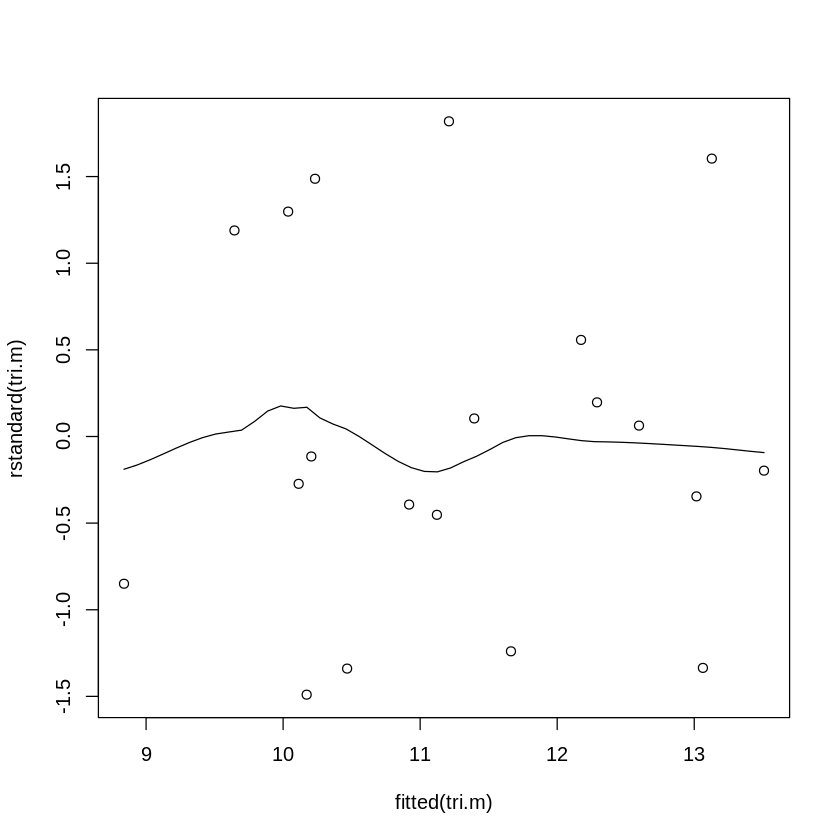

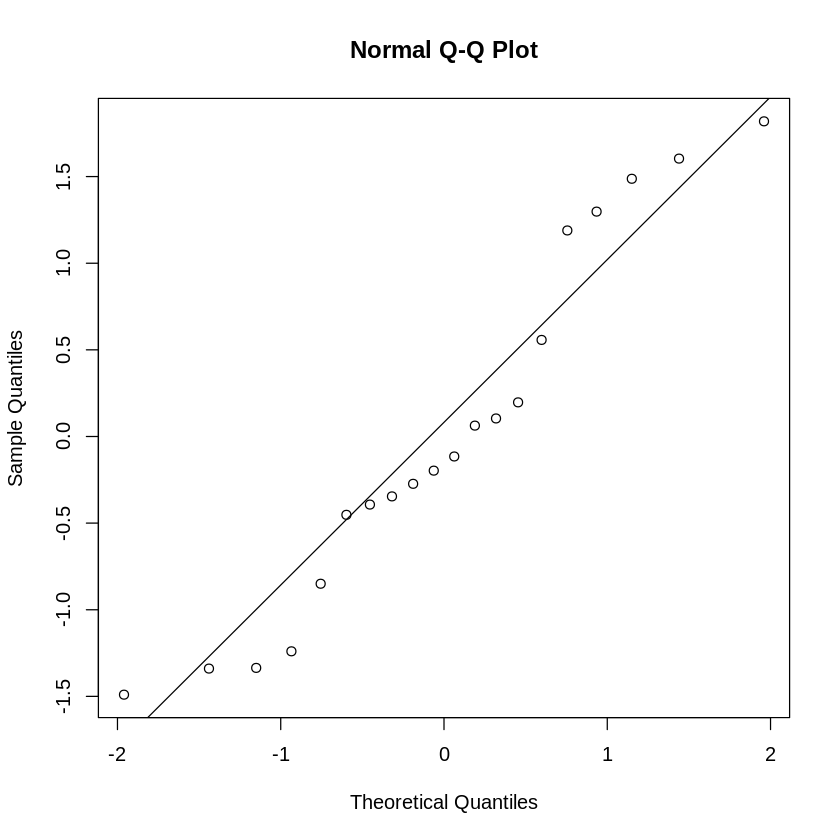

In [7]:
# 2, 3
scatter.smooth(rstandard(tri.m) ~ fitted(tri.m))
qqnorm(rstandard(tri.m)); qqline(rstandard(tri.m))
# plot(cooks.distance(tri.m), type = "h")

# anova(tri.m)

In [ ]:
# 4

In [10]:
# 5
tri.m2 = lm(y^2 ~ I(x1^2) + I(x2^2) - 1, data = triangle)
summary(tri.m2)


Call:
lm(formula = y^2 ~ I(x1^2) + I(x2^2) - 1, data = triangle)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.90109 -0.60017 -0.03213  0.92115  2.45666 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
I(x1^2)  1.03472    0.02263   45.73   <2e-16 ***
I(x2^2)  0.98910    0.00599  165.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.118 on 18 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9999 
F-statistic: 1.404e+05 on 2 and 18 DF,  p-value: < 2.2e-16


### 25

In an experiment [39, p 122] conducted to investigate the amount of
drug retained in the liver of a rat (Table 3.17; data set: ratliver), nineteen
rats were randomly selected, weighed, and placed under light anesthetic and
given an oral dose of the drug. Because large livers were thought to absorb
more of a given dose than a small liver, the dose was approximately deter-
mined as 40 mg of the drug per kg of body weight. After a ﬁxed length of
time, each rat was sacriﬁced, the liver weighed, and the percentage dose in
the liver y determined.
1. Plot DoseInLiver against each explanatory variable, and identify impor-
tant features to be modelled.
2. Fit a linear regression model with systematic component DoseInLiver ~
BodyWt + LiverWt + Dose.
3. Using t-tests, show that BodyWt and Dose are signiﬁcant for modelling
DoseInLiver.
4. In the study, the dose was determined as an approximate function of
body weight, hence both variables BodyWt and Dose measure almost the
same physical quantity. Why should both covariates be necessary in the
model? By computing the appropriate statistics, show that Observation 3
has high leverage and is inﬂuential.
5. Plot BodyWt against Dose, and identify Observation 3 to see the problem.
6. Fit the same linear regression model, after omitting Observation 3. Use
t-tests to show that none of the covariates are now statistically signiﬁcant.

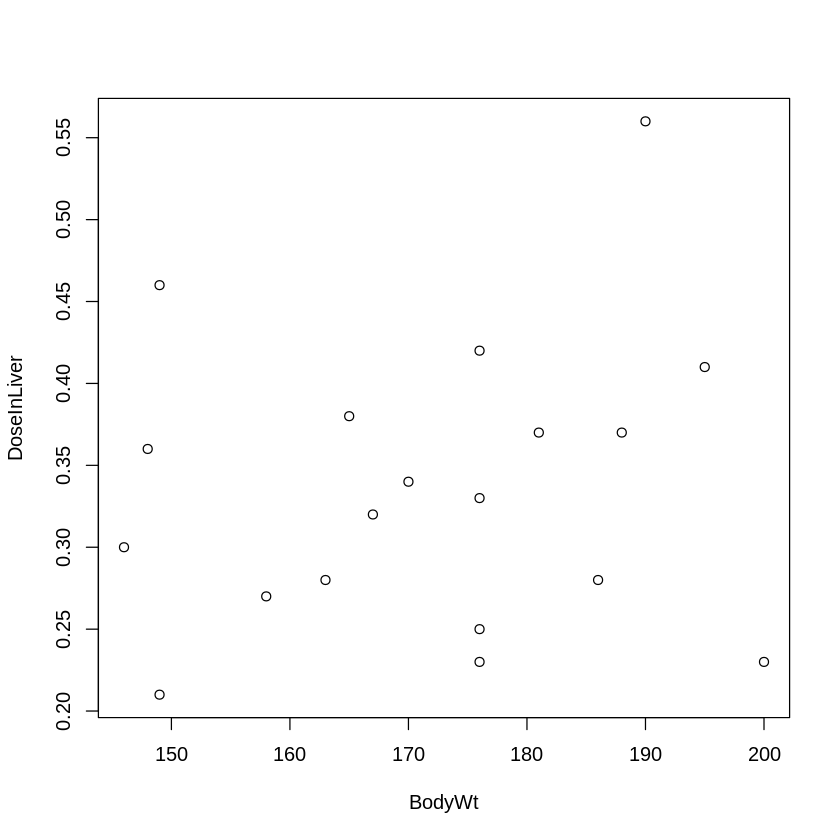

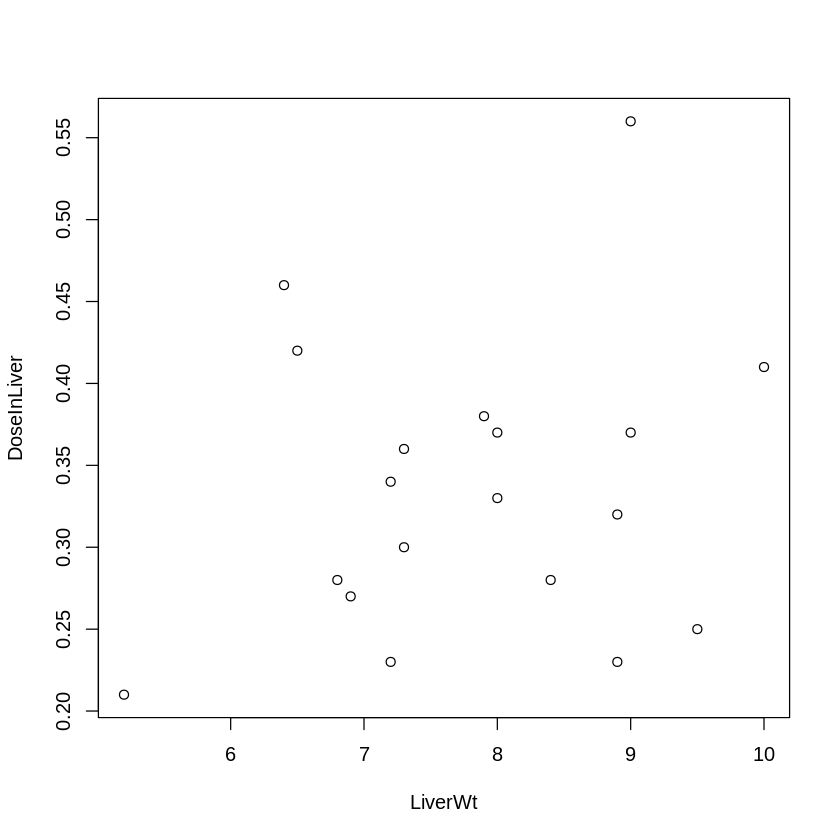

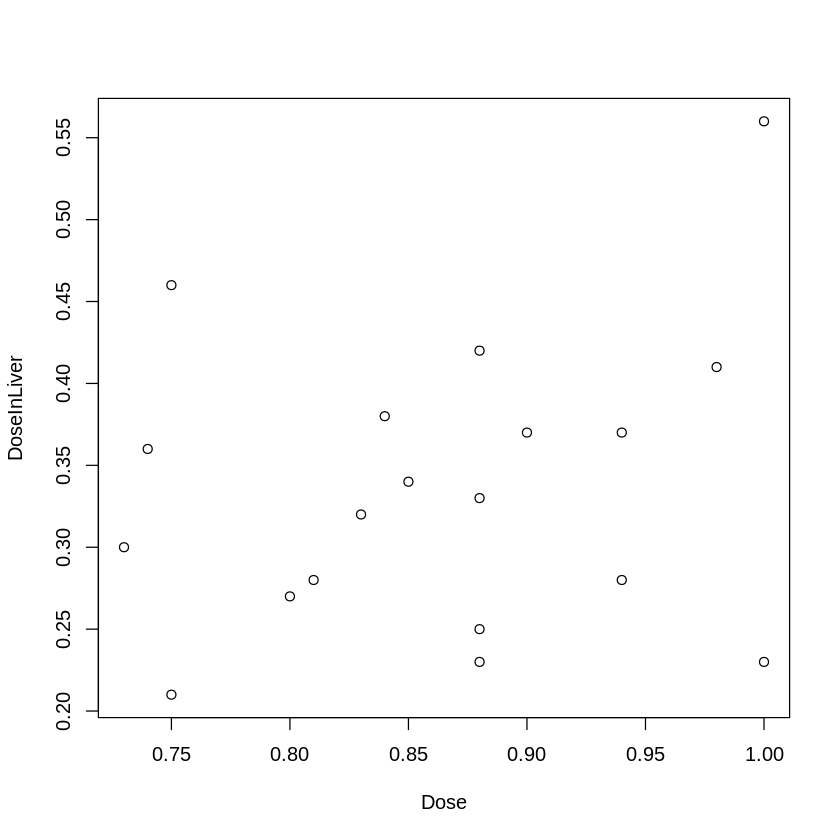

In [ ]:
data(ratliver)

### Part 1
plot(DoseInLiver ~ BodyWt, data=ratliver)
plot(DoseInLiver ~ LiverWt, data=ratliver)
plot(DoseInLiver ~ Dose, data=ratliver)

In [ ]:
### Part 2
m1 = lm(DoseInLiver ~ BodyWt + LiverWt + Dose, data=ratliver)

### Part 3
summary(m1); anova(m1)


Call:
lm(formula = DoseInLiver ~ BodyWt + LiverWt + Dose, data = ratliver)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.100557 -0.063233  0.007131  0.045971  0.134691 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.265922   0.194585   1.367   0.1919  
BodyWt      -0.021246   0.007974  -2.664   0.0177 *
LiverWt      0.014298   0.017217   0.830   0.4193  
Dose         4.178111   1.522625   2.744   0.0151 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07729 on 15 degrees of freedom
Multiple R-squared:  0.3639,	Adjusted R-squared:  0.2367 
F-statistic:  2.86 on 3 and 15 DF,  p-value: 0.07197


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
BodyWt,1,0.003215701,0.003215701,0.5382878,0.47445538
LiverWt,1,0.003067189,0.003067189,0.5134279,0.48466649
Dose,1,0.044981628,0.044981628,7.5296364,0.01506639
Residuals,15,0.089609165,0.005973944,NA,NA


Influence measures of
	 lm(formula = DoseInLiver ~ BodyWt + LiverWt + Dose, data = ratliver) :

     dfb.1_ dfb.BdyW  dfb.LvrW dfb.Dose   dffit cov.r   cook.d    hat inf
1  -0.03835  0.31492 -0.704363 -0.24375  0.8920 0.631 1.69e-01 0.1780    
2   0.14256 -0.09774 -0.481778  0.12561 -0.6088 1.016 8.85e-02 0.1793    
3  -0.23100 -1.66770  0.304572  1.74720  1.9048 7.401 9.30e-01 0.8509   *
4   0.12503 -0.12686 -0.303651  0.14009 -0.4944 0.860 5.72e-02 0.1076    
5   0.52161 -0.39627  0.550016  0.27474 -0.9095 1.524 2.03e-01 0.3915    
6   0.00229  0.01360  0.029003 -0.01715  0.0427 1.567 4.87e-04 0.1612    
7  -0.18376  0.15044 -0.083355 -0.11839  0.3096 1.289 2.46e-02 0.1369    
8  -0.29725  0.05936  0.246500 -0.04042  0.4262 1.520 4.69e-02 0.2537    
9  -0.00968  0.01791  0.000168 -0.01673  0.0427 1.402 4.88e-04 0.0670    
10 -0.00566  0.00993 -0.003365 -0.00929 -0.0140 1.496 5.23e-05 0.1197    
11 -0.29053  0.19381  0.100742 -0.17288 -0.4104 1.066 4.14e-02 0.1195    
12  0.21742 -0.0

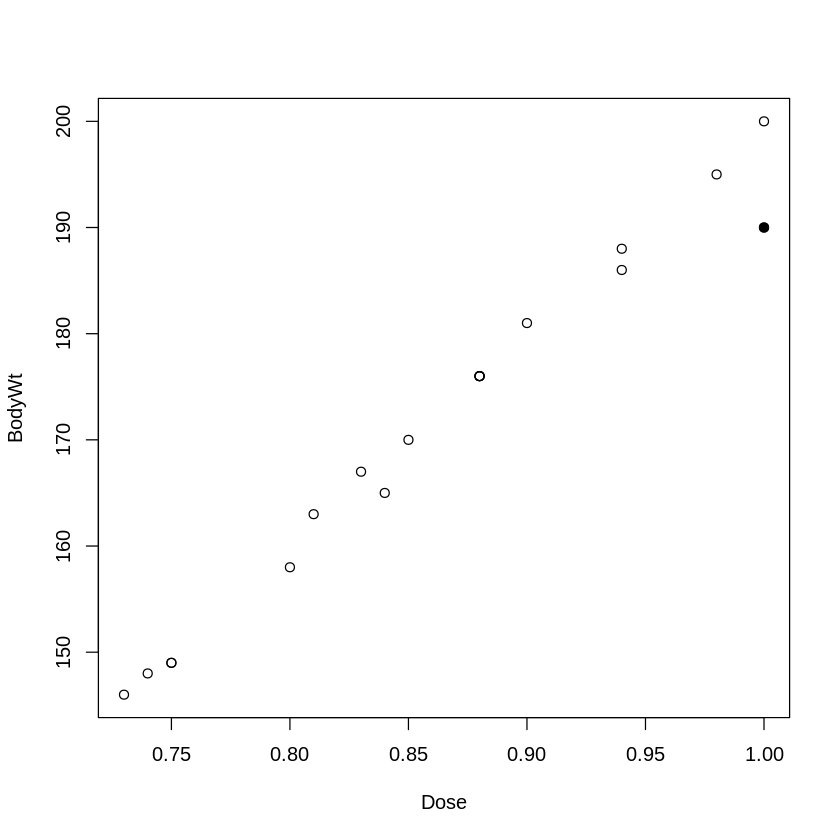

In [ ]:
### Part 4
influence.measures(m1)
infl = which.max(cooks.distance(m1))

### Plot 5
plot(BodyWt ~ Dose, data=ratliver)
points(BodyWt ~ Dose, subset=(infl), pch=19, data=ratliver)

In [ ]:
### Plot 6
m2 = update(m1, subset=(-infl)); summary(m2); anova(m2)


Call:
lm(formula = DoseInLiver ~ BodyWt + LiverWt + Dose, data = ratliver, 
    subset = (-infl))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.102154 -0.056486  0.002838  0.046519  0.137059 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.311427   0.205094   1.518    0.151
BodyWt      -0.007783   0.018717  -0.416    0.684
LiverWt      0.008989   0.018659   0.482    0.637
Dose         1.484877   3.713064   0.400    0.695

Residual standard error: 0.07825 on 14 degrees of freedom
Multiple R-squared:  0.02106,	Adjusted R-squared:  -0.1887 
F-statistic: 0.1004 on 3 and 14 DF,  p-value: 0.9585


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
BodyWt,1,3.798103e-05,3.798103e-05,0.006203361,0.9383371
LiverWt,1,8.268114e-04,8.268114e-04,0.135041343,0.7187569
Dose,1,9.791641e-04,9.791641e-04,0.159924787,0.6952607
Residuals,14,8.571715e-02,6.122654e-03,NA,NA


### 30

The average butterfat content of milk from dairy cows was recorded
for each of ﬁve breeds of cattle [18, 36]. Random samples of ten mature
(older than 4 years) and ten 2-year olds were taken (Table 3.22; data set:
butterfat).
1. Plot the percentage butterfat against breed, and also against age. Discuss
any features of the data that are apparent.
2. Use various transformation to make the variance of the response approxi-
mately constant. Which transformation appears appropriate? Does using
boxcox() help with the decision?
3. Fit an appropriate linear regression model, and interpret the appropriate
diagnostics.

In [16]:
data(butterfat); head(butterfat); summary(butterfat)

,Butterfat,Breed,Age
,<dbl>,<fct>,<fct>
1,3.74,Ayrshire,Mature
2,4.01,Ayrshire,2year
3,3.77,Ayrshire,Mature
4,3.78,Ayrshire,2year
5,4.10,Ayrshire,Mature
6,4.06,Ayrshire,2year


   Butterfat                  Breed        Age    
 Min.   :3.300   Ayrshire        :20   2year :50  
 1st Qu.:3.938   Canadian        :20   Mature:50  
 Median :4.405   Guernsey        :20              
 Mean   :4.482   Holstein-Fresian:20              
 3rd Qu.:4.987   Jersey          :20              
 Max.   :6.550                                    

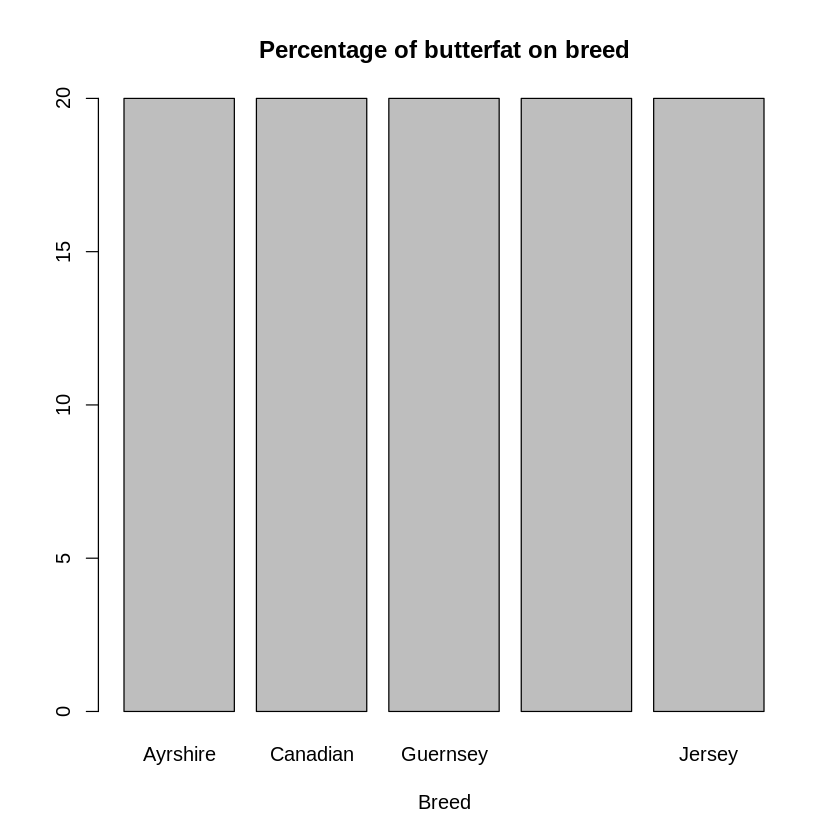

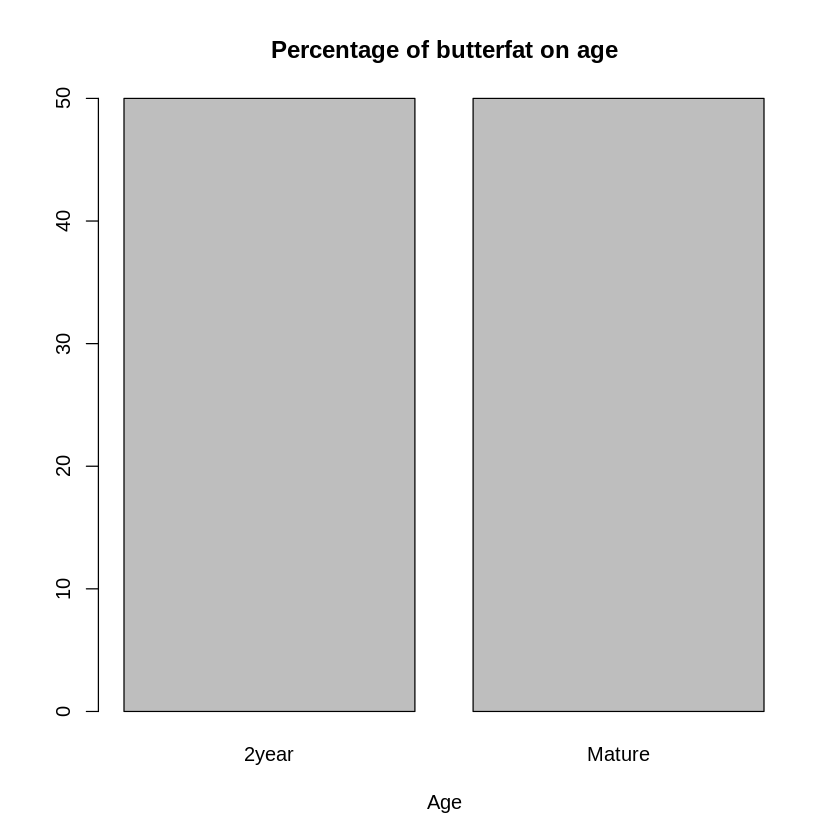

In [21]:
# 1
breed_table = table(butterfat$Breed)
barplot(breed_table, main = "Percentage of butterfat on breed", xlab = "Breed")

age_table = table(butterfat$Age)
barplot(age_table, main = "Percentage of butterfat on age", xlab = "Age")

In [ ]:
# 2
